## Preprocessing

### Load all climate data (Precip & Soil Moisture) station F102 - F108

In [1]:
%run -i function_.py

In [2]:
current_directory = os.getcwd()
path_to_save = current_directory+r'/Caddo_Agg'
os.makedirs(path_to_save, exist_ok=True)


### Load all the precipitation in the stations

In [3]:
df_station = pd.read_excel(os.getcwd()+"/Inputs/Physiography Data.xlsx",
                           engine="openpyxl", sheet_name=None, skiprows=1,)

# Print the name of each sheets
station_name = list(df_station.keys())[:5]
print("There are 5 stations \n {}".format(station_name))


There are 5 stations 
 ['F102', 'F106', 'F107', 'F108', 'F110']


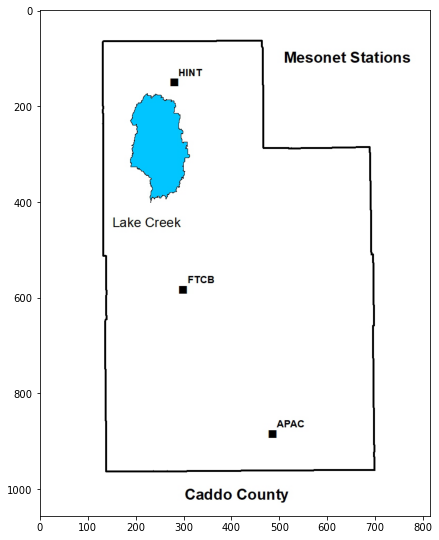

In [4]:
import matplotlib.image as img
import matplotlib.pyplot as plt

plt.subplots(figsize = (7,12))
# importing required libraries

# reading the image
im = img.imread(current_directory + r"/LakeCreek Caddo Mesonet.jpg")

# displaying the image
plt.imshow(im)
plt.show()

### Precipitation of all the stations

We choose the station with the most complete precipitation "F108".
<mark>F108</mark> has a high correlation with <mark>F106</mark> station that happens to be the next complete.
They both have the same soil property but different slopes


In [5]:
data = pd.read_excel(os.getcwd()+"/Inputs/Physiography Data.xlsx",
                     engine="openpyxl", sheet_name=None, )

data['Soils_Slopes']


# Merge the temperature and precipitation for the F108 station
df_F108 = df_station['F108'].drop(columns='mm')
df_F108["CMS"] = data["Discharge"].set_index('Date').loc['2005-07-01':]['CMS'].values
df_F108 = df_F108.set_index('Date')


In [6]:
# replace all odd values due to instrument reading and linear interpolate
df_F108 = df_F108.replace(-571.105400, np.nan)
df_F108 = df_F108.interpolate(method='linear', limit_direction='both')
status(df_F108)


Features     Observations    No of missing   % Missing
----------  --------------  ---------------  ------------
5 cm             5663              0         0.0%
25 cm            5663              0         0.0%
45 cm            5663              0         0.0%
CMS              5663              0         0.0%


### Merge the soil properties, temperature and precipitation 

In [7]:
# Load the excel
Caddo = pd.read_excel(os.getcwd()+"/Inputs/Caddo Mesonet Daily Temp Rain Data.xlsx",
                      engine="openpyxl", sheet_name=None, skiprows=4)['Caddo Mesonet']
Caddo = Caddo.set_index("Date")

# Merge the aggregated climate and F108 soils
df_F108 = df_F108.merge(Caddo,
                        how='inner',
                        on='Date')

# Rename the soil columns
df_F108 = df_F108.rename(columns={"5 cm": "SM 5 (cm)",
                                  "25 cm": "SM 25 (cm)",
                                  "45 cm": "SM 45 (cm)"})


### Deal with the missing values.

In [8]:
# replace all the -998  adn -996 with np.nan
df_F108 = df_F108.replace([-998, -996], np.nan)

status(df_F108)


Features     Observations    No of missing   % Missing
----------  --------------  ---------------  ------------
SM 5 (cm)        5663             88         1.6%
SM 25 (cm)       5663             88         1.6%
SM 45 (cm)       5663             88         1.6%
CMS              5663              0         0.0%
TMAX             5663              0         0.0%
TMIN             5663              0         0.0%
TAVG             5663              0         0.0%
RAIN             5663              0         0.0%


<AxesSubplot:ylabel='Date'>

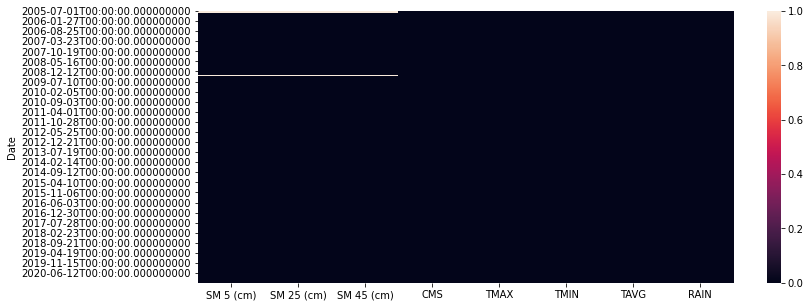

In [9]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.heatmap(df_F108.isna())

In [10]:
display_side_by_side([sequence_of_missing_values(df_F108, 'SM 5 (cm)'),
                     sequence_of_missing_values(df_F108, 'SM 25 (cm)'), sequence_of_missing_values(df_F108, 'SM 45 (cm)')],
                     ['5cm', '25cm', '45cm']
                     )

Drop the first 56 rows till 2005-08-26 and linear interpolate the dataframe

In [11]:
df_F108 = df_F108.loc['2005-08-26':].interpolate(
    method='linear', limit_direction='both')
status(df_F108)

Features     Observations    No of missing   % Missing
----------  --------------  ---------------  ------------
SM 5 (cm)        5607              0         0.0%
SM 25 (cm)       5607              0         0.0%
SM 45 (cm)       5607              0         0.0%
CMS              5607              0         0.0%
TMAX             5607              0         0.0%
TMIN             5607              0         0.0%
TAVG             5607              0         0.0%
RAIN             5607              0         0.0%


## F108 suggested Correction 

In [12]:
# 1-- Remove data prior to Dec-01-2006, as SM-45 sensor does not seem to work correctly

condition = df_F108.index >= '2006-12-01'
df_F108 = df_F108.loc[condition]

# 2-- A spike in SM-45 between Nov-2008 and Dec 2008 does not seem to be accurate
#     find out when this happened (date), replace it with NaN, and then fill-in via interpolation
condition = (df_F108.index > '2008-11-01') & (df_F108.index < '2008-12-01') & \
            (df_F108[df_F108.columns[6]] > 0.4)
print(df_F108.loc[condition, 'SM 45 (cm)'])

df_F108.loc[condition, 'SM 45 (cm)'] == np.NaN
df_F108['SM 45 (cm)'].interpolate(method='linear',
                                  limit_direction='both', inplace=True)
#print(status(df_F108))

# the rest of the data seems to be suitable for the analysis
#------------------------------------------------------------
# data size
print('sample size', len(df_F108))

Date
2008-11-02    0.14
2008-11-03    0.15
2008-11-04    0.15
2008-11-05    0.15
2008-11-06    0.15
2008-11-07    0.15
2008-11-08    0.15
2008-11-09    0.15
2008-11-10    0.15
2008-11-11    0.15
2008-11-12    0.15
2008-11-13    0.15
2008-11-14    0.15
2008-11-15    0.15
2008-11-16    0.15
2008-11-17    0.15
2008-11-18    0.15
2008-11-19    0.15
2008-11-20    0.15
2008-11-22    0.15
2008-11-23    0.15
2008-11-24    0.49
2008-11-25    0.11
2008-11-26    0.11
2008-11-27    0.10
2008-11-28    0.09
2008-11-29    0.09
2008-11-30    0.09
Name: SM 45 (cm), dtype: float64
sample size 5145


In [13]:
# 1  - Soil moisture content is a dimensionless quantity, expressed as a volumetric fraction

df_F108.rename(columns = {'SM 5 (cm)'  : 'SM 5 (-)', 
                          'SM 25 (cm)' : 'SM 25 (-)', 
                          'SM 45 (cm)' : 'SM 45 (-)'},
                           inplace = True )
df_F108 = df_F108.drop(columns="TAVG")
df_F108.describe()


SM 5 (-)    SM 25 (-)    SM 45 (-)          CMS         TMAX  \
count  5145.000000  5145.000000  5145.000000  5145.000000  5145.000000   
mean      0.198272     0.255364     0.195617     0.284911    22.332835   
std       0.091318     0.060546     0.050284     1.487521    10.427291   
min       0.030000     0.000000     0.000000     0.002264   -10.274074   
25%       0.130000     0.210000     0.160000     0.090277    14.912963   
50%       0.190000     0.270000     0.200000     0.151405    23.411111   
75%       0.250000     0.300000     0.230000     0.211118    31.070370   
max       0.460000     0.400000     0.490000    68.486000    43.508333   

              TMIN         RAIN  
count  5145.000000  5145.000000  
mean      9.334570     2.240449  
std       9.797812     7.533989  
min     -19.300000     0.000000  
25%       0.792593     0.000000  
50%       9.759259     0.000000  
75%      18.596296     0.254000  
max      27.425926   145.669000

## Feature Engineering

- create median and mean precipitations weekly and yearly frequency. 
- check the correlation between features on both time format.
- load the yearly yield
- Split the data into train and test
- Create the pipeline no tuning yet
-- XGBoost
-- Catboost
-- Random Forest
-- ExtraTree

### Correlation plots

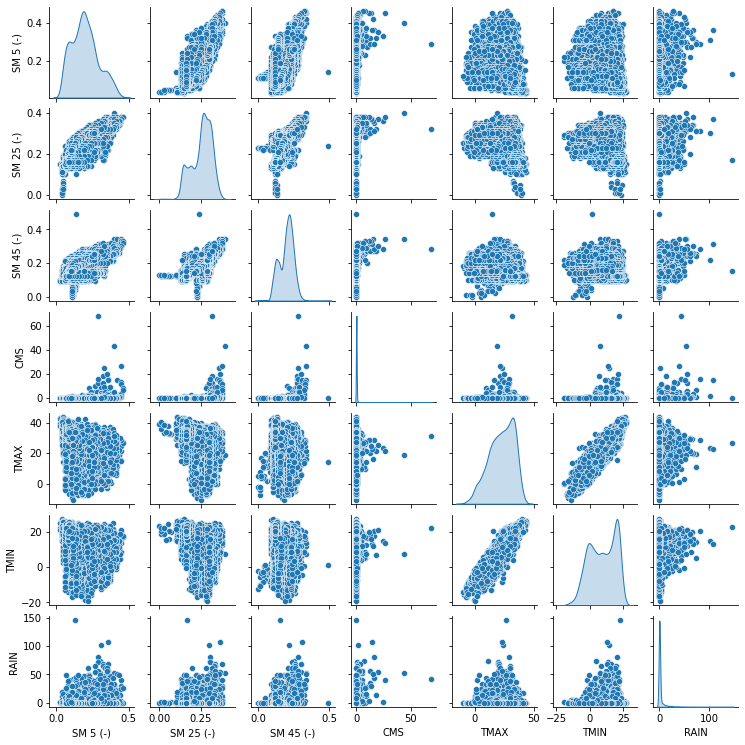

In [14]:
sns.pairplot(df_F108, diag_kind='kde', height=1.5)

### Correlation on daily data

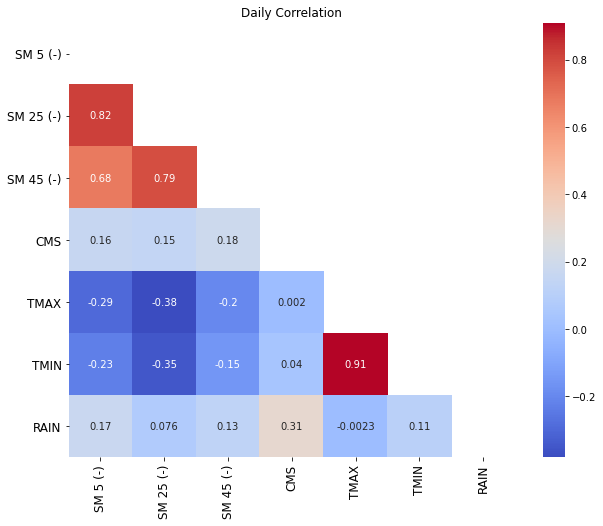

In [15]:
corr_plot(df_F108, 'Daily Correlation')

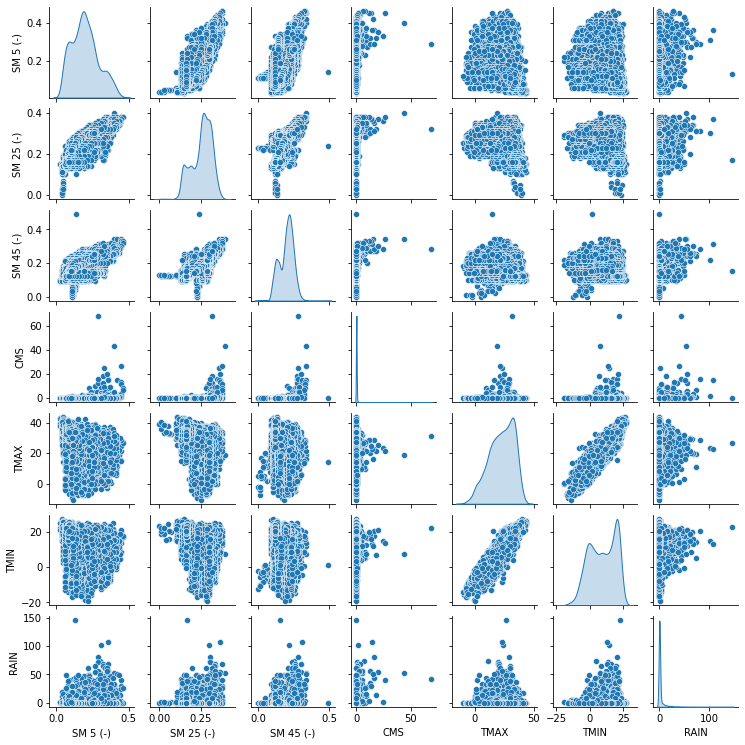

In [16]:
sns.pairplot(df_F108, diag_kind='kde', height=1.5)

## Daily Analysis

In [17]:
df_AI = df_F108.copy()
df_AI.rename(columns={'TMAX'  : '$T_{max}$ [$^oC$]', 
                      'TMIN'  : '$T_{min}$ [$^oC$]',
                      'RAIN' : '$P$ [$mm$]'         ,      
                      'CMS'       : '$Q [$m^3/s$]$'    , 
                      'SM 5 (-)'  : '$\theta_5$ [-]'   ,
                      'SM 25 (-)' : '$\theta_{25}$ [-]',
                      'SM 45 (-)' : '$\theta_{45}$ [-]'  }, inplace = True)

df_AI['Month'] = df_AI.index.month
df_AI

# Precipitation Lags
#df_AI['$P^{lag1} [mm]$'] = df_AI["$P [mm]$"].shift(1)
#df_AI['$P^{lag2} [mm]$'] = df_AI["$P [mm]$"].shift(2)

# Sort the columns
month  = df_AI.loc[:, df_AI.columns.str.startswith('M')]
prcp   = df_AI.loc[:, df_AI.columns.str.startswith('$P')]
temp   = df_AI.loc[:, df_AI.columns.str.startswith('$T')]
ds     = df_AI.loc[:, df_AI.columns.str.startswith('$Q')]
sm     = df_AI.loc[:, df_AI.columns.str.startswith('$\t')]

Features = list(df_AI.drop(columns=sm.columns.append(ds.columns)).columns)

df_AI = month.merge(temp, on='Date').merge(prcp, on='Date').merge(
    ds, on="Date").merge(sm, on="Date").dropna()

df_AI.head()


Month  $T_{max}$ [$^oC$]  $T_{min}$ [$^oC$]  $P$ [$mm$]  \
Date                                                                  
2006-12-01     12           3.187037         -12.440741    3.979333   
2006-12-02     12           3.268519          -6.998148    2.370667   
2006-12-03     12           2.555556          -5.485185    0.084667   
2006-12-04     12           8.709259          -5.822222    0.254000   
2006-12-05     12          12.851852          -2.903704    0.000000   

            $Q [$m^3/s$]$  $\theta_5$ [-]  $\theta_{25}$ [-]  \
Date                                                           
2006-12-01       0.096220            0.15               0.18   
2006-12-02       0.108389            0.16               0.18   
2006-12-03       0.098484            0.17               0.19   
2006-12-04       0.089428            0.19               0.23   
2006-12-05       0.092541            0.20               0.26   

            $\theta_{45}$ [-]  
Date                           
2006-12-01               0.12  
2006-12-02               0.12  
2006-12-03               0.12  
2006-12-04               0.12  
2006-12-05               0.12

### Daily SM_5 ($\theta_5$)

+-------------------------------+
|       Training set Score      |
+--------------+----------+-----+
|  Algorithm   | R-square | MSE |
+--------------+----------+-----+
| RandomForest |   0.88   | 0.0 |
|   XGBoost    |   0.76   | 0.0 |
|  ExtraTree   |   1.0    | 0.0 |
+--------------+----------+-----+
+--------------------------------+
|         Test set Score         |
+--------------+----------+------+
|  Algorithm   | R-square | RMSE |
+--------------+----------+------+
| RandomForest |   0.82   | 0.04 |
|   XGBoost    |   0.83   | 0.04 |
|  ExtraTree   |   0.87   | 0.03 |
+--------------+----------+------+


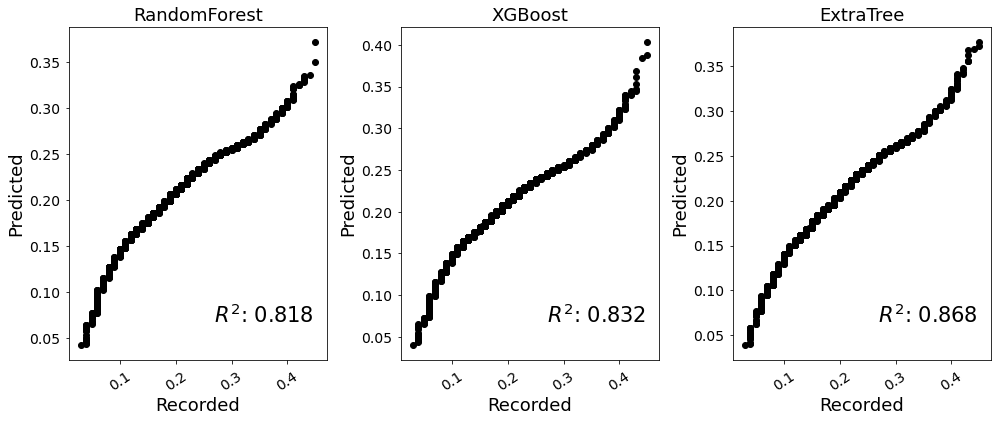

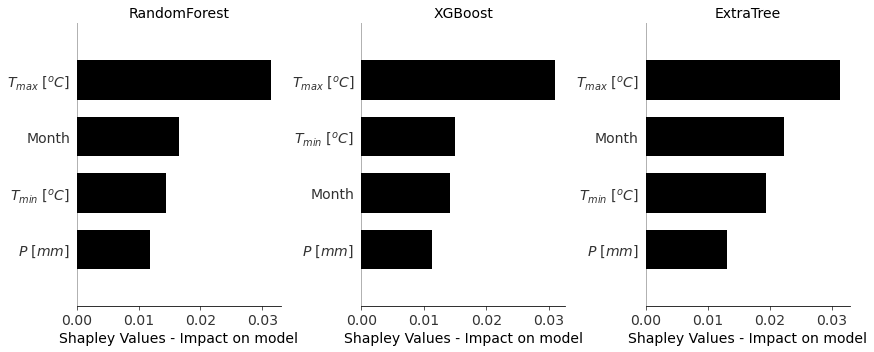

In [18]:
X = df_AI[Features].values # Tmax, Tmin, P, Q
y = df_AI.iloc[:, 5].values  # SM 5cm


X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y.ravel(),
                                                    test_size=0.3,)


pipeline_RF     = Pipeline([('RandomForest', RandomForestRegressor())])
pipeline_XGB    = Pipeline([('XGBoost', XGBRegressor())])
pipeline_ExTree = Pipeline([('ExtraTree', ExtraTreesRegressor())])
pipeliner       = [pipeline_RF, pipeline_XGB, pipeline_ExTree]

holdem = results(X_train, y_train, X_test, y_test, pipeliner)
print_results(holdem, y_test)


Soil = "daily_SM5"

feature_importance(path_to_save, Soil, pipeliner, X, y)

### Daily SM_25  ($\theta_{25}$)

+-------------------------------+
|       Training set Score      |
+--------------+----------+-----+
|  Algorithm   | R-square | MSE |
+--------------+----------+-----+
| RandomForest |   0.9    | 0.0 |
|   XGBoost    |   0.79   | 0.0 |
|  ExtraTree   |   1.0    | 0.0 |
+--------------+----------+-----+
+--------------------------------+
|         Test set Score         |
+--------------+----------+------+
|  Algorithm   | R-square | RMSE |
+--------------+----------+------+
| RandomForest |   0.87   | 0.02 |
|   XGBoost    |   0.87   | 0.02 |
|  ExtraTree   |   0.9    | 0.02 |
+--------------+----------+------+


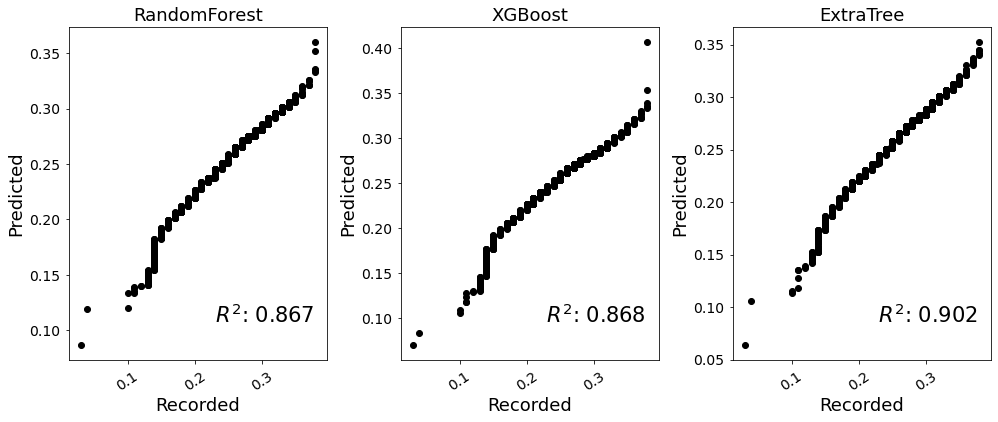

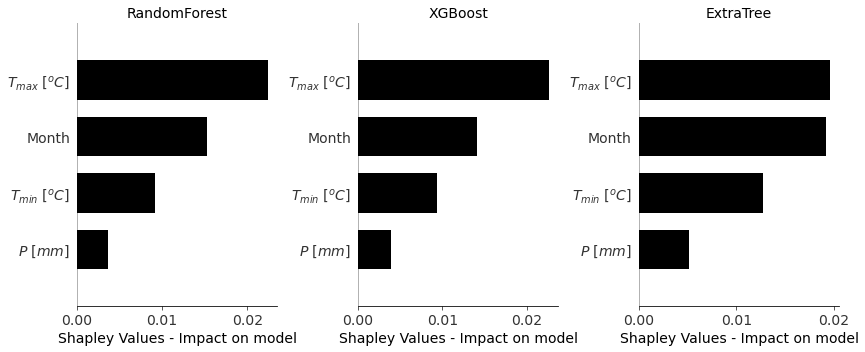

In [19]:
X = df_AI[Features].values
y = df_AI.iloc[:,6].values  # SM 25cm


X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y.ravel(),
                                                    test_size=0.3)


pipeline_RF     = Pipeline([('RandomForest', RandomForestRegressor())])
pipeline_XGB    = Pipeline([('XGBoost', XGBRegressor())])
pipeline_ExTree = Pipeline([('ExtraTree', ExtraTreesRegressor())])
pipeliner       = [pipeline_RF, pipeline_XGB, pipeline_ExTree]

holdem = results(X_train, y_train, X_test, y_test, pipeliner)

print_results(holdem, y_test)


Soil = "daily_SM25"

feature_importance(path_to_save, Soil, pipeliner, X, y)


### Daily SM_45 ($\theta_{45}$)

+-------------------------------+
|       Training set Score      |
+--------------+----------+-----+
|  Algorithm   | R-square | MSE |
+--------------+----------+-----+
| RandomForest |   0.89   | 0.0 |
|   XGBoost    |   0.77   | 0.0 |
|  ExtraTree   |   1.0    | 0.0 |
+--------------+----------+-----+
+--------------------------------+
|         Test set Score         |
+--------------+----------+------+
|  Algorithm   | R-square | RMSE |
+--------------+----------+------+
| RandomForest |   0.86   | 0.02 |
|   XGBoost    |   0.85   | 0.02 |
|  ExtraTree   |   0.9    | 0.02 |
+--------------+----------+------+


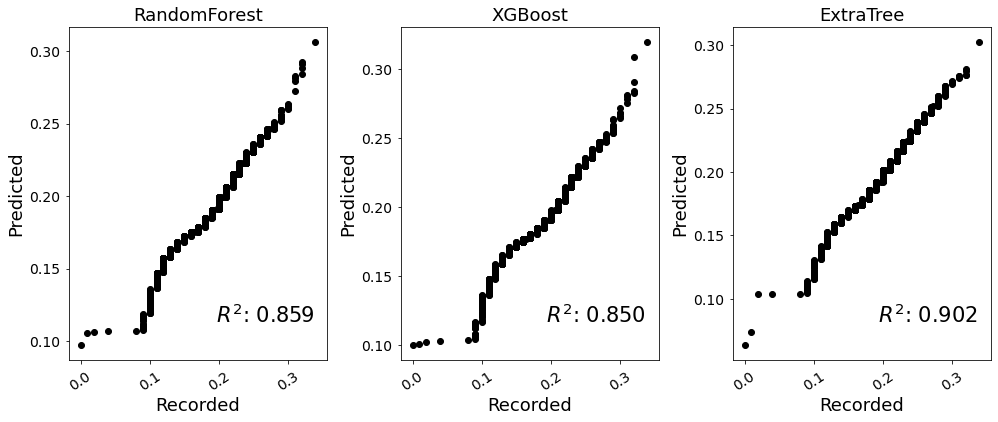

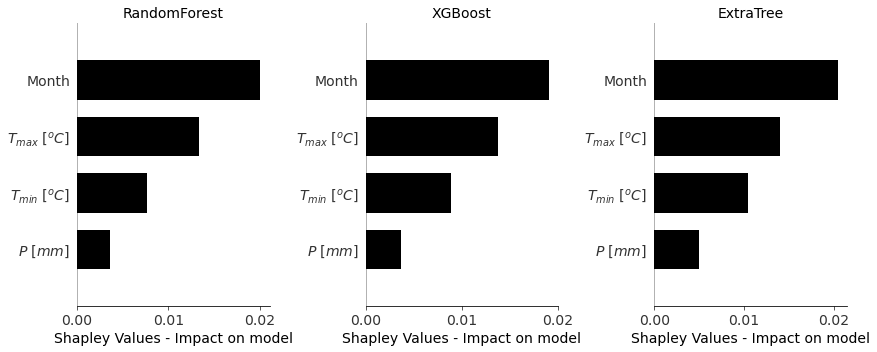

In [20]:
X = df_AI[Features].values
y = df_AI.iloc[:, 7].values  # SM 45cm


X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y.ravel(),
                                                    test_size=0.3)


pipeline_RF     = Pipeline([('RandomForest', RandomForestRegressor())])
pipeline_XGB    = Pipeline([('XGBoost', XGBRegressor())])
pipeline_ExTree = Pipeline([('ExtraTree', ExtraTreesRegressor())])
pipeliner       = [pipeline_RF, pipeline_XGB, pipeline_ExTree]

holdem = results(X_train, y_train, X_test, y_test, pipeliner)
print_results(holdem, y_test)


Soil = "daily_SM45"

feature_importance(path_to_save, Soil, pipeliner, X, y)


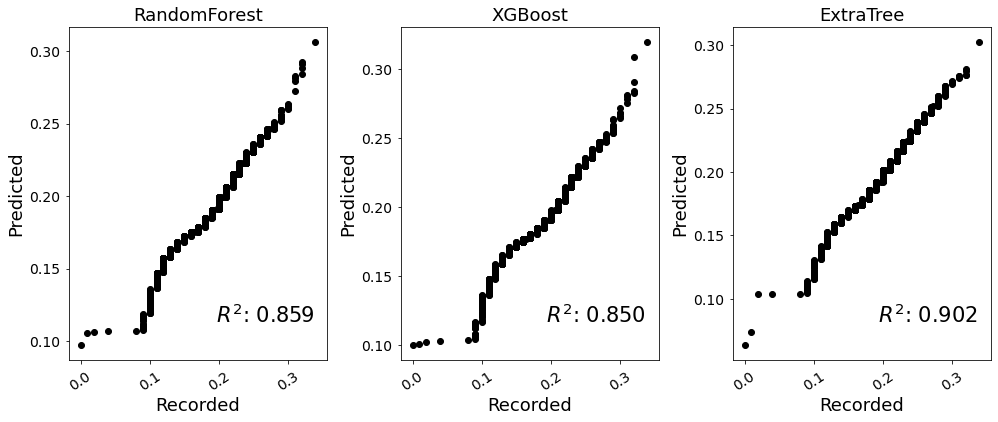

In [21]:
print_results(holdem,y_test)

Lags were ommited on the daily scale 

## Daily Analysis with lags

In [22]:
df_AI = df_F108.copy()
df_AI.rename(columns={'TMAX'  : '$T_{max}$ [$^oC$]', 
                      'TMIN'  : '$T_{min}$ [$^oC$]',
                      'RAIN' : '$P$ [$mm$]'         ,      
                      'CMS'       : '$Q [$m^3/s$]$'    , 
                      'SM 5 (-)'  : '$\theta_5$ [-]'   ,
                      'SM 25 (-)' : '$\theta_{25}$ [-]',
                      'SM 45 (-)' : '$\theta_{45}$ [-]'  }, inplace = True)

df_AI['Month'] = df_AI.index.month


# Precipitation Lags
df_AI['$P_{-1}$ [mm]'] = df_AI['$P$ [$mm$]'].shift(1)
df_AI['$P_{-2}$ [mm]'] = df_AI['$P$ [$mm$]'].shift(2)

# Precipitation Lags
#df_AI['$P^{lag1} [mm]$'] = df_AI["$P [mm]$"].shift(1)
#df_AI['$P^{lag2} [mm]$'] = df_AI["$P [mm]$"].shift(2)

# Sort the columns
month  = df_AI.loc[:, df_AI.columns.str.startswith('M')]
prcp   = df_AI.loc[:, df_AI.columns.str.startswith('$P')]
temp   = df_AI.loc[:, df_AI.columns.str.startswith('$T')]
ds     = df_AI.loc[:, df_AI.columns.str.startswith('$Q')]
sm     = df_AI.loc[:, df_AI.columns.str.startswith('$\t')]

Features = list(df_AI.drop(columns=sm.columns.append(ds.columns)).columns)

df_AI = month.merge(temp, on='Date').merge(prcp, on='Date').merge(
    ds, on="Date").merge(sm, on="Date").dropna()

df_AI


Month  $T_{max}$ [$^oC$]  $T_{min}$ [$^oC$]  $P$ [$mm$]  \
Date                                                                  
2006-12-03     12           2.555556          -5.485185    0.084667   
2006-12-04     12           8.709259          -5.822222    0.254000   
2006-12-05     12          12.851852          -2.903704    0.000000   
2006-12-06     12          11.800000          -1.244444    0.000000   
2006-12-07     12           2.896296          -7.507407    0.000000   
...           ...                ...                ...         ...   
2020-12-27     12          18.762963           2.261111    0.000000   
2020-12-28     12           8.098148           1.694444    0.000000   
2020-12-29     12          14.438889           3.703704   17.018000   
2020-12-30     12           5.718519          -0.290741   14.393333   
2020-12-31     12           1.677778          -2.537037    8.890000   

            $P_{-1}$ [mm]  $P_{-2}$ [mm]  $Q [$m^3/s$]$  $\theta_5$ [-]  \
Date                                                                      
2006-12-03       2.370667       3.979333       0.098484            0.17   
2006-12-04       0.084667       2.370667       0.089428            0.19   
2006-12-05       0.254000       0.084667       0.092541            0.20   
2006-12-06       0.000000       0.254000       0.093390            0.20   
2006-12-07       0.000000       0.000000       0.086315            0.19   
...                   ...            ...            ...             ...   
2020-12-27       0.000000       0.000000       0.135557            0.25   
2020-12-28       0.000000       0.000000       0.153669            0.25   
2020-12-29       0.000000       0.000000       0.136123            0.26   
2020-12-30      17.018000       0.000000       0.498080            0.33   
2020-12-31      14.393333      17.018000       0.331110            0.31   

            $\theta_{25}$ [-]  $\theta_{45}$ [-]  
Date                                              
2006-12-03               0.19               0.12  
2006-12-04               0.23               0.12  
2006-12-05               0.26               0.12  
2006-12-06               0.26               0.12  
2006-12-07               0.26               0.12  
...                       ...                ...  
2020-12-27               0.30               0.24  
2020-12-28               0.30               0.24  
2020-12-29               0.30               0.25  
2020-12-30               0.33               0.30  
2020-12-31               0.32               0.27  

[5143 rows x 10 columns]

### SM_5 ($\theta_5$)

+--------------------------------+
|       Training set Score       |
+--------------+----------+------+
|  Algorithm   | R-square | MSE  |
+--------------+----------+------+
| RandomForest |   0.88   | 0.28 |
|   XGBoost    |   1.0    | 0.01 |
|  ExtraTree   |   1.0    | 0.0  |
+--------------+----------+------+
+--------------------------------+
|         Test set Score         |
+--------------+----------+------+
|  Algorithm   | R-square | RMSE |
+--------------+----------+------+
| RandomForest |   0.53   | 0.93 |
|   XGBoost    |   0.68   | 0.76 |
|  ExtraTree   |   0.58   | 0.88 |
+--------------+----------+------+


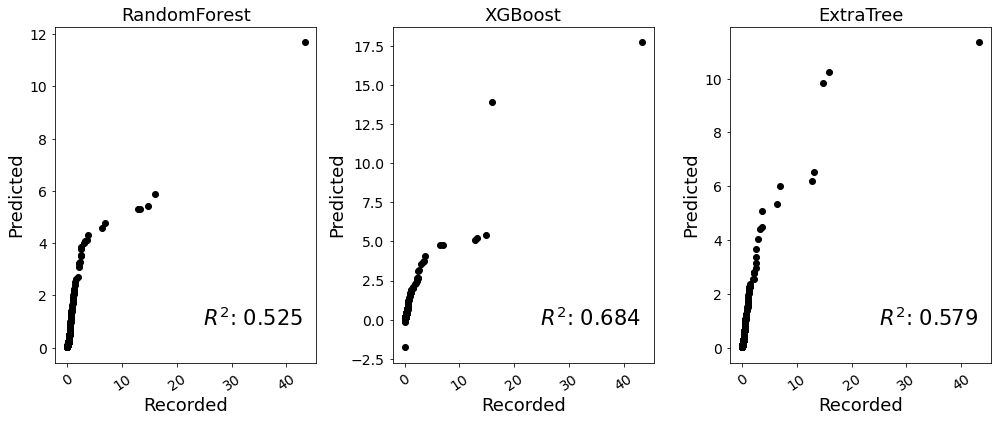

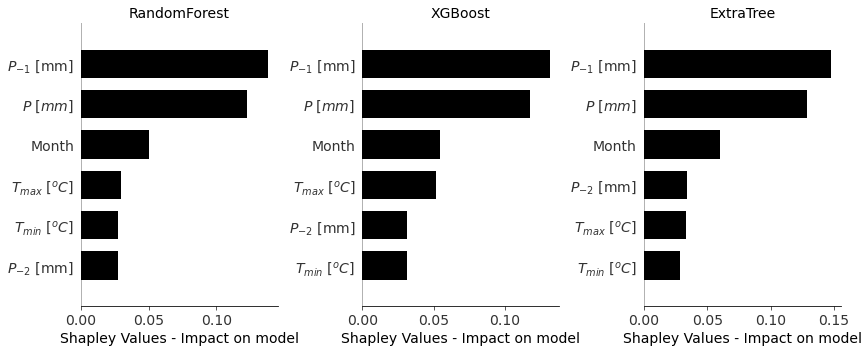

In [23]:
X = df_AI[Features].values
y = df_AI.iloc[:, 6].values  # SM 5cm


X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y.ravel(),
                                                    test_size=0.3)


pipeline_RF     = Pipeline([('RandomForest', RandomForestRegressor())])
pipeline_XGB    = Pipeline([('XGBoost', XGBRegressor())])
pipeline_ExTree = Pipeline([('ExtraTree', ExtraTreesRegressor())])
pipeliner       = [pipeline_RF, pipeline_XGB, pipeline_ExTree]

holdem = results(X_train, y_train, X_test, y_test, pipeliner)
print_results(holdem, y_test)


Soil = "3d_SM5"

feature_importance(path_to_save, Soil, pipeliner, X, y, )

### SM_25 ($\theta_{25}$)

+--------------------------------+
|       Training set Score       |
+--------------+----------+------+
|  Algorithm   | R-square | MSE  |
+--------------+----------+------+
| RandomForest |   0.91   | 0.25 |
|   XGBoost    |   1.0    | 0.01 |
|  ExtraTree   |   1.0    | 0.0  |
+--------------+----------+------+
+--------------------------------+
|         Test set Score         |
+--------------+----------+------+
|  Algorithm   | R-square | RMSE |
+--------------+----------+------+
| RandomForest |   0.89   | 0.28 |
|   XGBoost    |   0.8    | 0.38 |
|  ExtraTree   |   0.89   | 0.28 |
+--------------+----------+------+


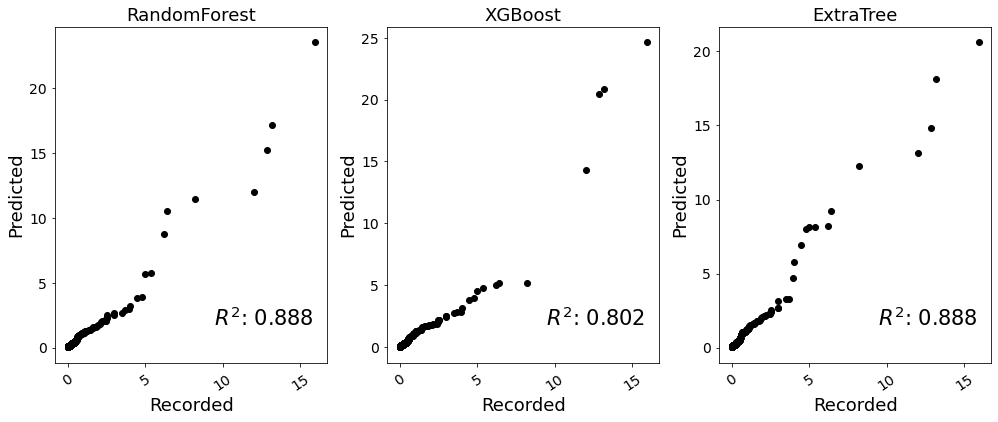

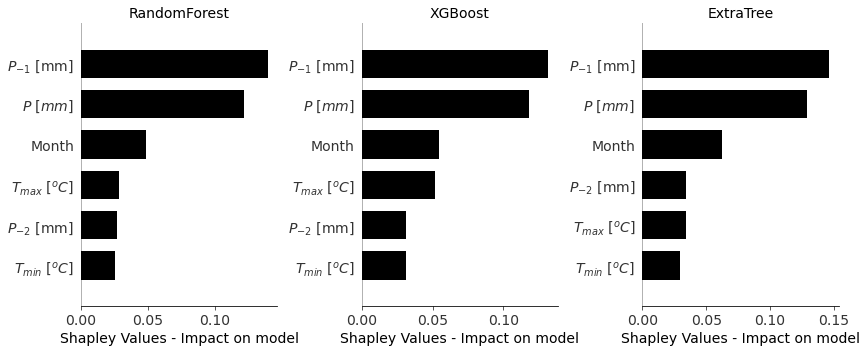

In [24]:
X = df_AI[Features].values
y = df_AI.iloc[:,6].values  # SM 25cm


X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y.ravel(),
                                                    test_size=0.3)


pipeline_RF     = Pipeline([('RandomForest', RandomForestRegressor())])
pipeline_XGB    = Pipeline([('XGBoost', XGBRegressor())])
pipeline_ExTree = Pipeline([('ExtraTree', ExtraTreesRegressor())])
pipeliner       = [pipeline_RF, pipeline_XGB, pipeline_ExTree]

holdem = results(X_train, y_train, X_test, y_test, pipeliner)

print_results(holdem, y_test)


Soil = "daily_SM25"

feature_importance(path_to_save, Soil, pipeliner, X, y)

### SM_45 ($\theta_{45}$)

+-------------------------------+
|       Training set Score      |
+--------------+----------+-----+
|  Algorithm   | R-square | MSE |
+--------------+----------+-----+
| RandomForest |   0.9    | 0.0 |
|   XGBoost    |   0.82   | 0.0 |
|  ExtraTree   |   1.0    | 0.0 |
+--------------+----------+-----+
+--------------------------------+
|         Test set Score         |
+--------------+----------+------+
|  Algorithm   | R-square | RMSE |
+--------------+----------+------+
| RandomForest |   0.83   | 0.04 |
|   XGBoost    |   0.86   | 0.03 |
|  ExtraTree   |   0.86   | 0.03 |
+--------------+----------+------+


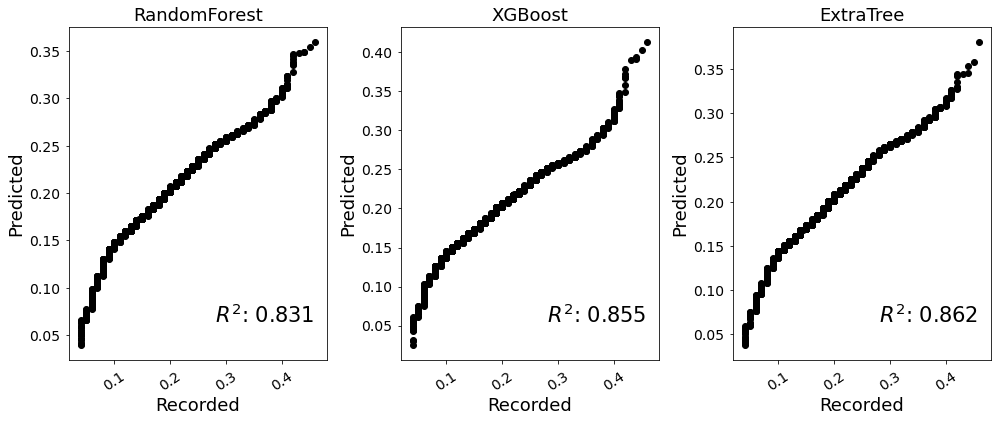

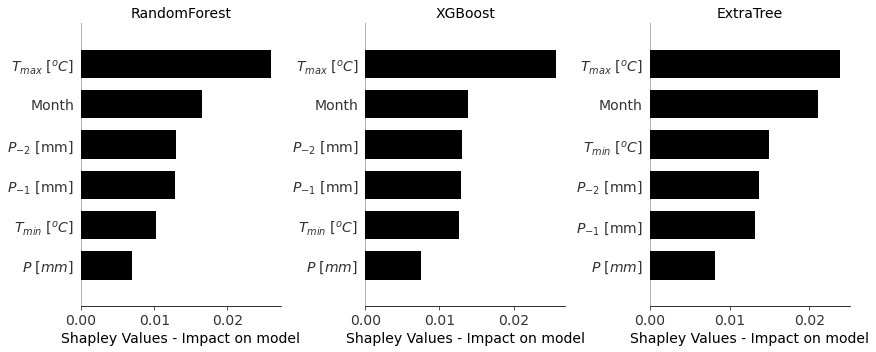

In [25]:
X = df_AI[Features].values
y = df_AI.iloc[:, 7].values  # SM 45cm


X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y.ravel(),
                                                    test_size=0.3)


pipeline_RF     = Pipeline([('RandomForest', RandomForestRegressor())])
pipeline_XGB    = Pipeline([('XGBoost', XGBRegressor())])
pipeline_ExTree = Pipeline([('ExtraTree', ExtraTreesRegressor())])
pipeliner       = [pipeline_RF, pipeline_XGB, pipeline_ExTree]

holdem = results(X_train, y_train, X_test, y_test, pipeliner)
print_results(holdem, y_test)


Soil = "daily_SM45"

feature_importance(path_to_save, Soil, pipeliner, X, y)

## 2 Days Rolling average

In [26]:
df_F108.head(3)

SM 5 (-)  SM 25 (-)  SM 45 (-)       CMS      TMAX       TMIN  \
Date                                                                        
2006-12-01      0.15       0.18       0.12  0.096220  3.187037 -12.440741   
2006-12-02      0.16       0.18       0.12  0.108389  3.268519  -6.998148   
2006-12-03      0.17       0.19       0.12  0.098484  2.555556  -5.485185   

                RAIN  
Date                  
2006-12-01  3.979333  
2006-12-02  2.370667  
2006-12-03  0.084667

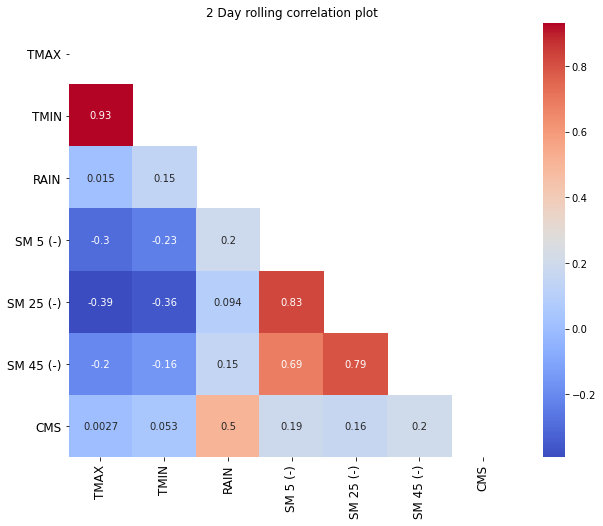

In [27]:
# Resample the temperature

resampled = df_F108[['TMAX', "TMIN"]].resample('2D').median()

# Resample the Precipitation sum and median
resampled["RAIN"] = df_F108["RAIN"].resample('2D').sum()
#resampled["RAIN_median"] = df_F108["RAIN_median"].resample('2D').median()

# Resample the discharge sum
#resampled["CMS_sum"] = df_F108["CMS"].resample('2D').sum()
resampled["CMS"] = df_F108["CMS"].resample('2D').median()

# Resample the SM
#resampled_SM = df_F108.iloc[:, 4:].resample('2D').mean()
resampled_SM = df_F108.iloc[:, :4].resample('2D').median()
# The transformed precipitation mean and median

df_F108_resampled = resampled.merge(resampled_SM, on='Date', how="inner")
df_F108_resampled

corr_plot(df_F108_resampled.drop(columns='CMS_median'),
                                         '2 Day rolling correlation plot')


In [30]:
df_AI = df_F108_resampled
df_AI.rename( columns = {'TMAX'      : '$T_{max}$ [$^oC$]', 
                         'TMIN'      : '$T_{min}$ [$^oC$]',
                         'RAIN' : '$P$ [$mm$]'       ,
                         'CMS'    : '$Q [$m^3/s$]$'    , 
                         'SM 5 (-)'      : '$\theta_5$ [-]'   ,
                         'SM 25 (-)'     : '$\theta_{25}$ [-]',
                         'SM 45 (-)'     : '$\theta_{45}$ [-]'  }, inplace = True)

#corr_plot(df_AI, 'DF_AI correlation plot')'$P$ [$mm$]'

# Precipitation Lags
df_AI['$P_{-1}$ [mm]'] = df_AI['$P$ [$mm$]'].shift(1)
df_AI['$P_{-2}$ [mm]'] = df_AI['$P$ [$mm$]'].shift(2)

# Sort the columns
month  = df_AI.loc[:, df_AI.columns.str.startswith('M')]
prcp   = df_AI.loc[:, df_AI.columns.str.startswith('$P')]
temp   = df_AI.loc[:, df_AI.columns.str.startswith('$T')]
ds     = df_AI.loc[:, df_AI.columns.str.startswith('$Q')]
sm     = df_AI.loc[:, df_AI.columns.str.startswith('$\t')]

Features = list(df_AI.drop(columns= sm.columns.append(ds.columns)).columns)

# Merge the dataframe
df_AI = month.merge(temp, on='Date').merge(prcp, on='Date').merge(
    ds, on="Date").merge(sm, on="Date").dropna()



### SM_5

+--------------------------------+
|       Training set Score       |
+--------------+----------+------+
|  Algorithm   | R-square | MSE  |
+--------------+----------+------+
| RandomForest |   0.87   | 0.19 |
|   XGBoost    |   1.0    | 0.0  |
|  ExtraTree   |   1.0    | 0.0  |
+--------------+----------+------+
+--------------------------------+
|         Test set Score         |
+--------------+----------+------+
|  Algorithm   | R-square | RMSE |
+--------------+----------+------+
| RandomForest |   0.96   | 0.16 |
|   XGBoost    |   0.88   | 0.28 |
|  ExtraTree   |   0.99   | 0.08 |
+--------------+----------+------+


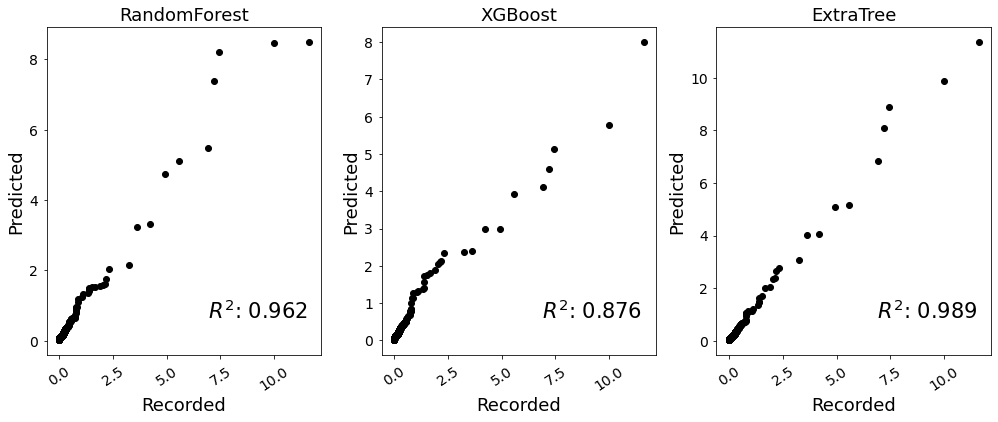

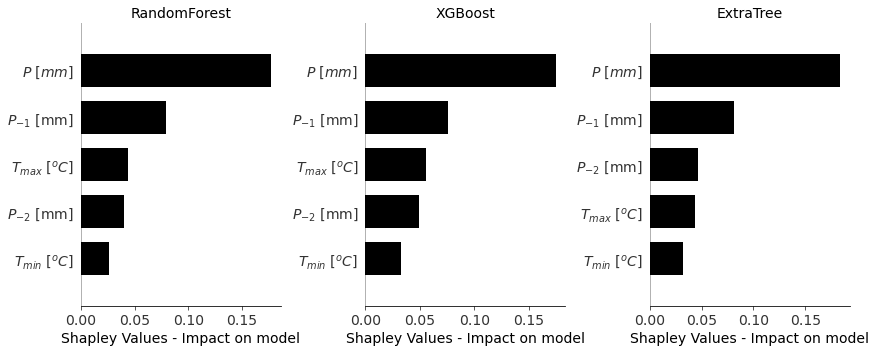

In [31]:
X = df_AI[Features].values
y = df_AI.iloc[:, 6].values  # SM 5cm


X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y.ravel(),
                                                    test_size=0.3)


pipeline_RF     = Pipeline([('RandomForest', RandomForestRegressor())])
pipeline_XGB    = Pipeline([('XGBoost', XGBRegressor())])
pipeline_ExTree = Pipeline([('ExtraTree', ExtraTreesRegressor())])
pipeliner       = [pipeline_RF, pipeline_XGB, pipeline_ExTree]

holdem = results(X_train, y_train, X_test, y_test, pipeliner)
print_results(holdem, y_test)


Soil = "2d_SM5"

feature_importance(path_to_save, Soil, pipeliner, X, y, )

### SM_25

+-------------------------------+
|       Training set Score      |
+--------------+----------+-----+
|  Algorithm   | R-square | MSE |
+--------------+----------+-----+
| RandomForest |   0.9    | 0.0 |
|   XGBoost    |   0.92   | 0.0 |
|  ExtraTree   |   1.0    | 0.0 |
+--------------+----------+-----+
+--------------------------------+
|         Test set Score         |
+--------------+----------+------+
|  Algorithm   | R-square | RMSE |
+--------------+----------+------+
| RandomForest |   0.83   | 0.04 |
|   XGBoost    |   0.88   | 0.03 |
|  ExtraTree   |   0.85   | 0.04 |
+--------------+----------+------+


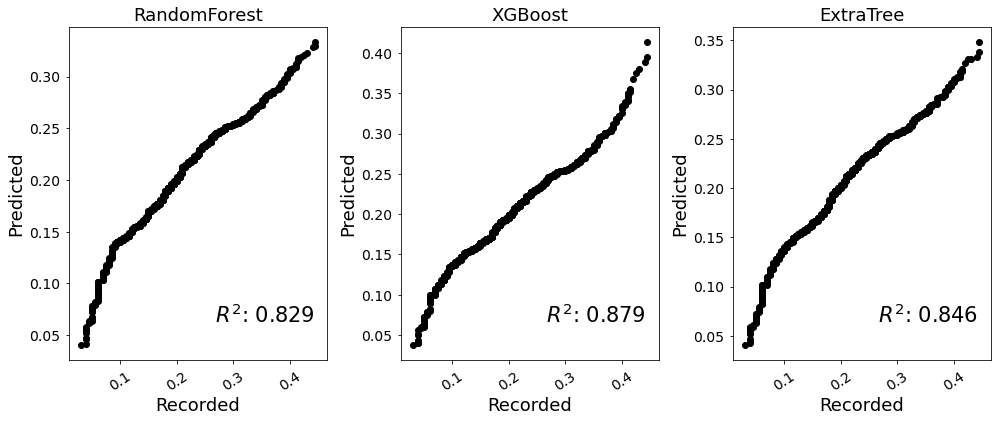

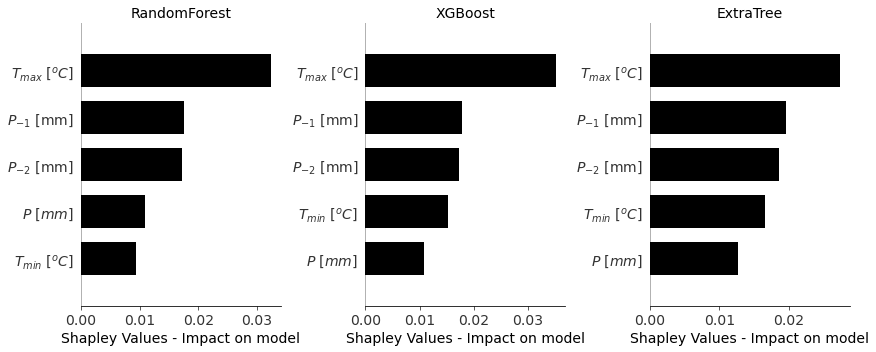

In [32]:
X = df_AI[Features].values
y = df_AI.iloc[:, 7].values  # SM 25cm


X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y.ravel(),
                                                    test_size=0.3)


pipeline_RF     = Pipeline([('RandomForest', RandomForestRegressor())])
pipeline_XGB    = Pipeline([('XGBoost', XGBRegressor())])
pipeline_ExTree = Pipeline([('ExtraTree', ExtraTreesRegressor())])
pipeliner       = [pipeline_RF, pipeline_XGB, pipeline_ExTree]

holdem = results(X_train, y_train, X_test, y_test, pipeliner)
print_results(holdem, y_test)




Soil = "2d_SM25"

feature_importance(path_to_save, Soil, pipeliner, X, y)


### SM_45

+-------------------------------+
|       Training set Score      |
+--------------+----------+-----+
|  Algorithm   | R-square | MSE |
+--------------+----------+-----+
| RandomForest |   0.89   | 0.0 |
|   XGBoost    |   0.93   | 0.0 |
|  ExtraTree   |   1.0    | 0.0 |
+--------------+----------+-----+
+--------------------------------+
|         Test set Score         |
+--------------+----------+------+
|  Algorithm   | R-square | RMSE |
+--------------+----------+------+
| RandomForest |   0.87   | 0.02 |
|   XGBoost    |   0.92   | 0.02 |
|  ExtraTree   |   0.88   | 0.02 |
+--------------+----------+------+


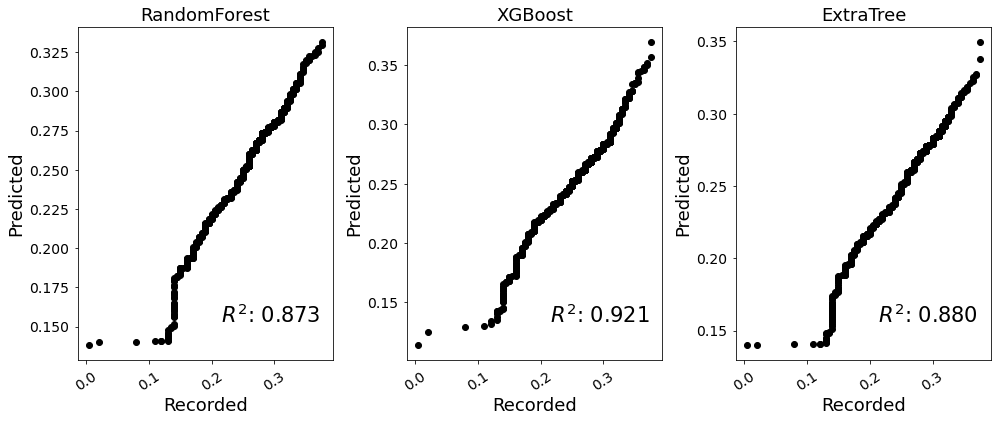

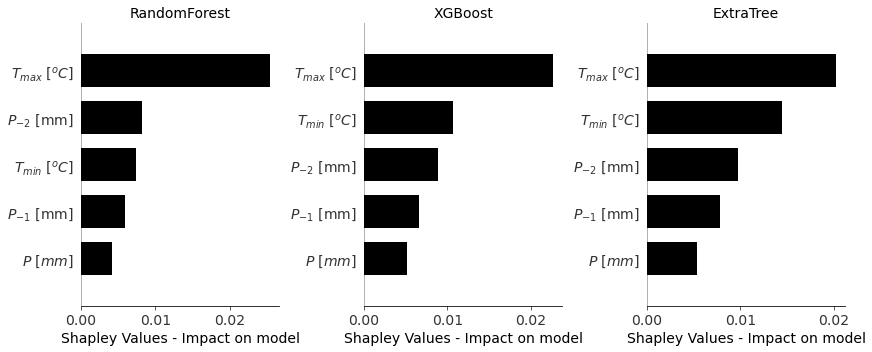

In [33]:
X = df_AI[Features].values
y = df_AI.iloc[:, 8].values  # SM 45cm


X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y.ravel(),
                                                    test_size=0.3)


pipeline_RF     = Pipeline([('RandomForest', RandomForestRegressor())])
pipeline_XGB    = Pipeline([('XGBoost', XGBRegressor())])
pipeline_ExTree = Pipeline([('ExtraTree', ExtraTreesRegressor())])
pipeliner       = [pipeline_RF, pipeline_XGB, pipeline_ExTree]

holdem = results(X_train, y_train, X_test, y_test, pipeliner)
print_results(holdem, y_test)


Soil = "2d_SM45"

feature_importance(path_to_save, Soil, pipeliner,X ,y,)


## 3 Days Rolling average

In [46]:
df_F108.head(3)

SM 5 (-)  SM 25 (-)  SM 45 (-)       CMS      TMAX       TMIN  \
Date                                                                        
2006-12-01      0.15       0.18       0.12  0.096220  3.187037 -12.440741   
2006-12-02      0.16       0.18       0.12  0.108389  3.268519  -6.998148   
2006-12-03      0.17       0.19       0.12  0.098484  2.555556  -5.485185   

                RAIN  
Date                  
2006-12-01  3.979333  
2006-12-02  2.370667  
2006-12-03  0.084667

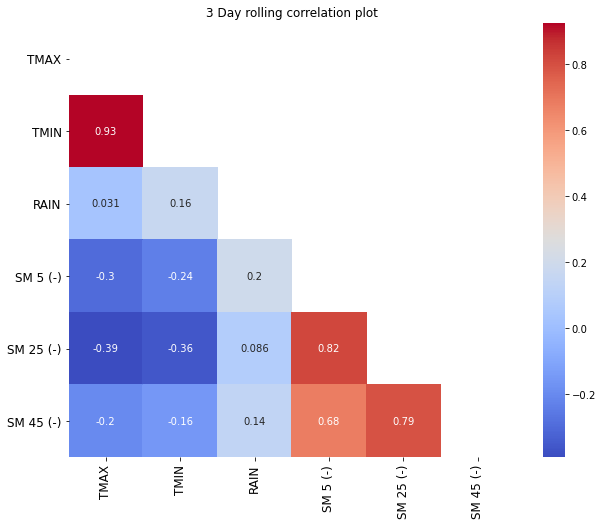

In [51]:
# Resample the temperature
resampled = df_F108[['TMAX', "TMIN"]].resample('3D').median()

# Resample the Precipitation sum and median
resampled["RAIN"] = df_F108["RAIN"].resample('3D').sum()
#resampled["RAIN_median"] = df_F108["RAIN_median"].resample('3D').median()

# Resample the discharge sum
#resampled["CMS_sum"] = df_F108["CMS"].resample('3D').sum()
resampled["CMS_median"] = df_F108["CMS"].resample('3D').median()

# Resample the SM
#resampled_SM = df_F108.iloc[:, :4].resample('3D').mean()
resampled_SM = df_F108.iloc[:, :3].resample('3D').median()
# The transformed precipitation mean and median

df_F108_resampled = resampled.merge(resampled_SM, on='Date', how="inner")
df_F108_resampled

corr_plot(df_F108_resampled.drop(columns='CMS_median'),
                                         '3 Day rolling correlation plot')


In [53]:
df_AI = df_F108_resampled

df_AI.rename( columns = {'TMAX'      : '$T_{max}$ [$^oC$]', 
                         'TMIN'      : '$T_{min}$ [$^oC$]',
                         'RAIN'         : '$P$ [$mm$]'       ,
                         'CMS_median'    : '$Q [$m^3/s$]$'    , 
                         'SM 5 (-)'      : '$\theta_5$ [-]'   ,
                         'SM 25 (-)'     : '$\theta_{25}$ [-]',
                         'SM 45 (-)'     : '$\theta_{45}$ [-]'  }, inplace = True)

#corr_plot(df_AI, 'DF_AI correlation plot')'$P$ [$mm$]'

# Precipitation Lags
df_AI['$P_{-1}$ [mm]'] = df_AI['$P$ [$mm$]'].shift(1)
df_AI['$P_{-2}$ [mm]'] = df_AI['$P$ [$mm$]'].shift(2)

# Sort the columns
month  = df_AI.loc[:, df_AI.columns.str.startswith('M')]
prcp   = df_AI.loc[:, df_AI.columns.str.startswith('$P')]
temp   = df_AI.loc[:, df_AI.columns.str.startswith('$T')]
ds     = df_AI.loc[:, df_AI.columns.str.startswith('$Q')]
sm     = df_AI.loc[:, df_AI.columns.str.startswith('$\t')]

Features = list(df_AI.drop(columns=list(sm.columns.append(ds.columns))).columns)

# Merge the dataframe
df_AI = month.merge(temp, on='Date').merge(prcp, on='Date').merge(
    ds, on="Date").merge(sm, on="Date").dropna()


df_AI


$T_{max}$ [$^oC$]  $T_{min}$ [$^oC$]  $P$ [$mm$]  $P_{-1}$ [mm]  \
Date                                                                          
2006-12-07           5.400000          -7.507407    0.000000       0.254000   
2006-12-10          17.753704           2.937037    0.000000       0.000000   
2006-12-13          19.316667           0.431481    0.000000       0.000000   
2006-12-16          13.900000           2.779630    1.608667       0.000000   
2006-12-19           8.861111           2.025926   37.930667       1.608667   
...                       ...                ...         ...            ...   
2020-12-17          11.688889          -0.479630    5.334000       7.620000   
2020-12-20          17.725926           0.035185    0.000000       5.334000   
2020-12-23          14.350000          -5.172222    0.000000       0.000000   
2020-12-26          17.885185           1.694444    0.000000       0.000000   
2020-12-29           5.718519          -0.290741   40.301333       0.000000   

            $P_{-2}$ [mm]  $Q [$m^3/s$]$  $\theta_5$ [-]  $\theta_{25}$ [-]  \
Date                                                                          
2006-12-07       6.434667       0.086032            0.18               0.26   
2006-12-10       0.254000       0.086032            0.17               0.25   
2006-12-13       0.000000       0.085749            0.16               0.25   
2006-12-16       0.000000       0.085183            0.15               0.25   
2006-12-19       0.000000       0.142915            0.21               0.28   
...                   ...            ...             ...                ...   
2020-12-17       6.858000       0.157914            0.28               0.31   
2020-12-20       7.620000       0.147726            0.27               0.31   
2020-12-23       5.334000       0.128482            0.26               0.30   
2020-12-26       0.000000       0.135557            0.25               0.30   
2020-12-29       0.000000       0.331110            0.31               0.32   

            $\theta_{45}$ [-]  
Date                           
2006-12-07               0.12  
2006-12-10               0.12  
2006-12-13               0.13  
2006-12-16               0.13  
2006-12-19               0.19  
...                       ...  
2020-12-17               0.25  
2020-12-20               0.25  
2020-12-23               0.24  
2020-12-26               0.24  
2020-12-29               0.27  

[1713 rows x 9 columns]

### SM_5

+-------------------------------+
|       Training set Score      |
+--------------+----------+-----+
|  Algorithm   | R-square | MSE |
+--------------+----------+-----+
| RandomForest |   0.9    | 0.0 |
|   XGBoost    |   0.96   | 0.0 |
|  ExtraTree   |   1.0    | 0.0 |
+--------------+----------+-----+
+--------------------------------+
|         Test set Score         |
+--------------+----------+------+
|  Algorithm   | R-square | RMSE |
+--------------+----------+------+
| RandomForest |   0.86   | 0.03 |
|   XGBoost    |   0.93   | 0.02 |
|  ExtraTree   |   0.87   | 0.03 |
+--------------+----------+------+


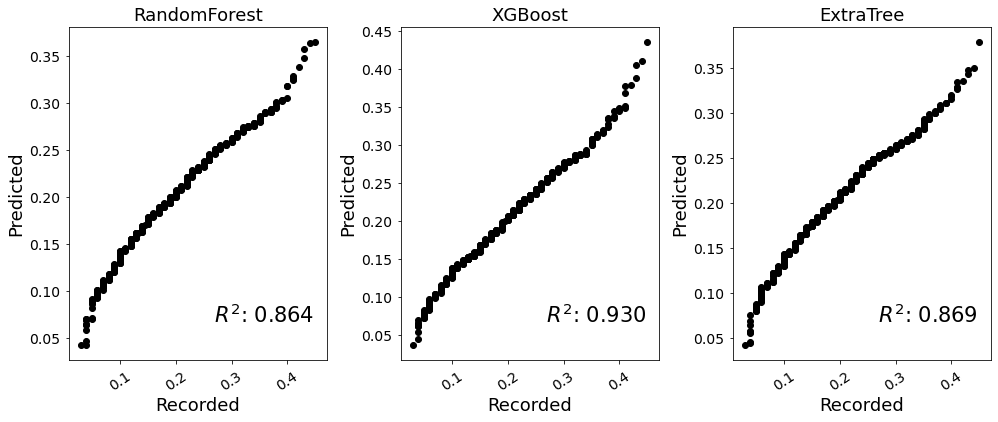

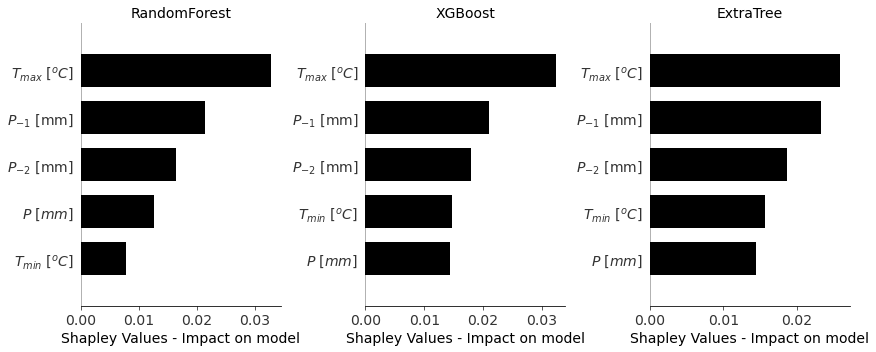

In [55]:
X = df_AI[Features].values
y = df_AI.iloc[:, 6].values  # SM 5cm


X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y.ravel(),
                                                    test_size=0.3)


pipeline_RF     = Pipeline([('RandomForest', RandomForestRegressor())])
pipeline_XGB    = Pipeline([('XGBoost', XGBRegressor())])
pipeline_ExTree = Pipeline([('ExtraTree', ExtraTreesRegressor())])
pipeliner       = [pipeline_RF, pipeline_XGB, pipeline_ExTree]

holdem = results(X_train, y_train, X_test, y_test, pipeliner)
print_results(holdem, y_test)


Soil = "3d_SM5"

feature_importance(path_to_save, Soil, pipeliner, X, y, )


### SM_25

+-------------------------------+
|       Training set Score      |
+--------------+----------+-----+
|  Algorithm   | R-square | MSE |
+--------------+----------+-----+
| RandomForest |   0.9    | 0.0 |
|   XGBoost    |   0.97   | 0.0 |
|  ExtraTree   |   1.0    | 0.0 |
+--------------+----------+-----+
+--------------------------------+
|         Test set Score         |
+--------------+----------+------+
|  Algorithm   | R-square | RMSE |
+--------------+----------+------+
| RandomForest |   0.87   | 0.02 |
|   XGBoost    |   0.92   | 0.02 |
|  ExtraTree   |   0.89   | 0.02 |
+--------------+----------+------+


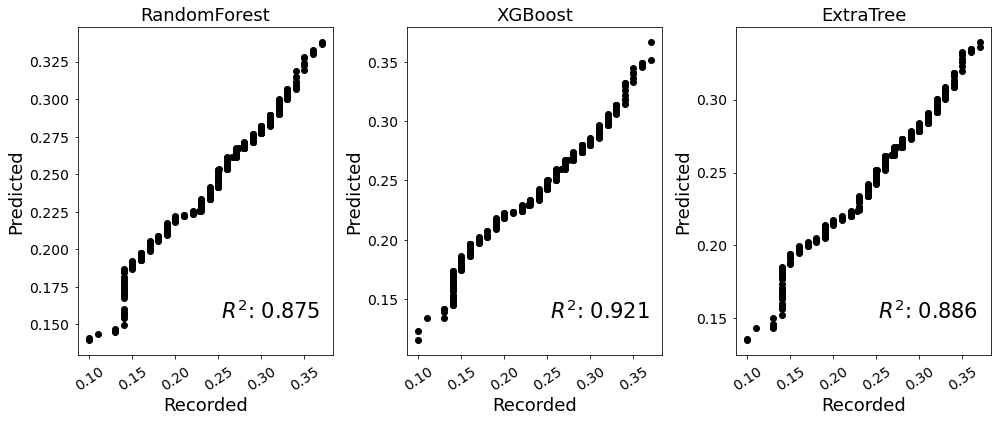

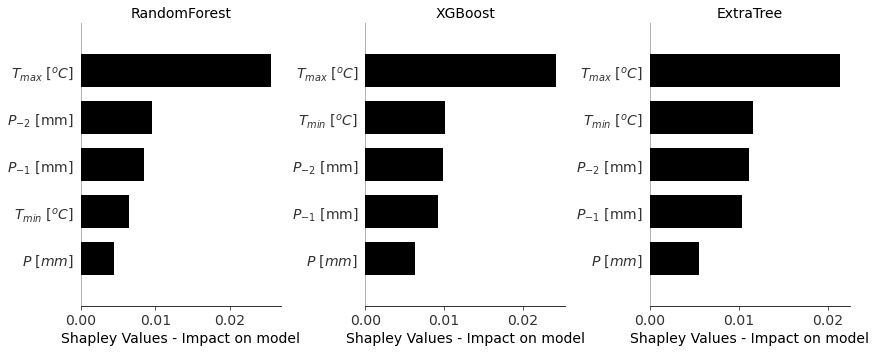

In [56]:
X = df_AI[Features].values
y = df_AI.iloc[:, 7].values  # SM 5cm


X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y.ravel(),
                                                    test_size=0.3)


pipeline_RF     = Pipeline([('RandomForest', RandomForestRegressor())])
pipeline_XGB    = Pipeline([('XGBoost', XGBRegressor())])
pipeline_ExTree = Pipeline([('ExtraTree', ExtraTreesRegressor())])
pipeliner       = [pipeline_RF, pipeline_XGB, pipeline_ExTree]

holdem = results(X_train, y_train, X_test, y_test, pipeliner)
print_results(holdem, y_test)




Soil = "3d_SM25"

feature_importance(path_to_save, Soil, pipeliner, X, y)


### SM_45

+-------------------------------+
|       Training set Score      |
+--------------+----------+-----+
|  Algorithm   | R-square | MSE |
+--------------+----------+-----+
| RandomForest |   0.88   | 0.0 |
|   XGBoost    |   0.96   | 0.0 |
|  ExtraTree   |   1.0    | 0.0 |
+--------------+----------+-----+
+--------------------------------+
|         Test set Score         |
+--------------+----------+------+
|  Algorithm   | R-square | RMSE |
+--------------+----------+------+
| RandomForest |   0.77   | 0.02 |
|   XGBoost    |   0.86   | 0.02 |
|  ExtraTree   |   0.78   | 0.02 |
+--------------+----------+------+


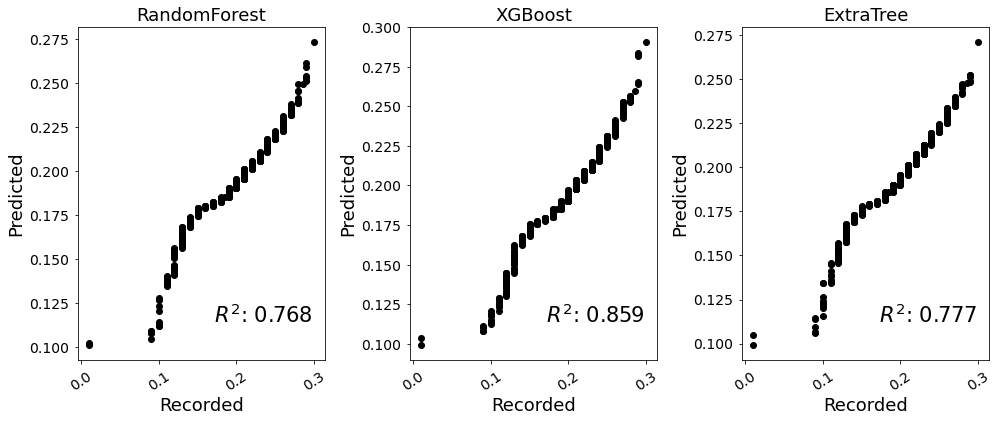

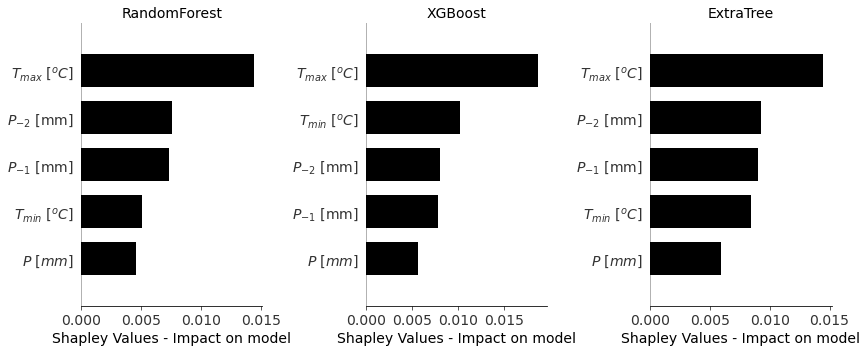

In [57]:
X = df_AI[Features].values
y = df_AI.iloc[:, 8].values  # SM 45cm


X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y.ravel(),
                                                    test_size=0.3)


pipeline_RF     = Pipeline([('RandomForest', RandomForestRegressor())])
pipeline_XGB    = Pipeline([('XGBoost', XGBRegressor())])
pipeline_ExTree = Pipeline([('ExtraTree', ExtraTreesRegressor())])
pipeliner       = [pipeline_RF, pipeline_XGB, pipeline_ExTree]

holdem = results(X_train, y_train, X_test, y_test, pipeliner)
print_results(holdem, y_test)


Soil = "3d_SM45"

feature_importance(path_to_save, Soil, pipeliner,X ,y,)


## Weekly

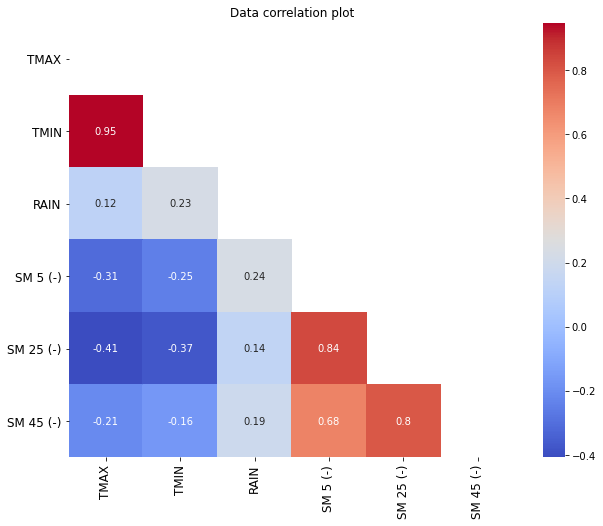

In [58]:
# Resample the temperature
resampled = df_F108[['TMAX', "TMIN"]].resample('W').median()

# Resample the Precipitation sum and median
resampled["RAIN"] = df_F108["RAIN"].resample('W').sum()
#resampled["RAIN_median"] = df_F108["RAIN_median"].resample('W').median()

# Resample the discharge sum
#resampled["CMS_sum"]    = df_F108["CMS"].resample('W').sum()
resampled["CMS_median"] = df_F108["CMS"].resample('W').median()

# Resample the SM
# resampled_SM = df_F108.iloc[:, 4:].resample('W').mean()
resampled_SM = df_F108.iloc[:, :3].resample('W').median()
# The transformed precipitation mean and median

df_F108_resampled = resampled.merge(resampled_SM, on='Date', how="inner")


corr_plot(df_F108_resampled.drop(columns='CMS_median'), 'Data correlation plot')



The pearson correlation shows that the resampled weekly mean RAIN has a higher correlation with other features than the median

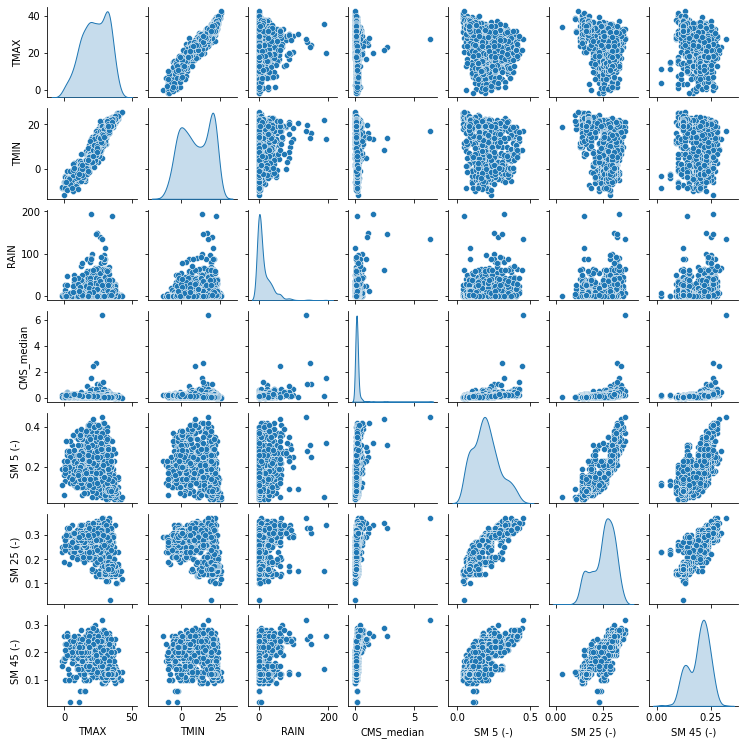

In [59]:
sns.pairplot(df_F108_resampled, diag_kind='kde', height=1.5)

In [61]:
df_F108_resampled.head(3)

TMAX      TMIN      RAIN  CMS_median  SM 5 (-)  SM 25 (-)  \
Date                                                                         
2006-12-03   3.187037 -6.998148  6.434667    0.098484      0.16       0.18   
2006-12-10  11.800000 -2.903704  0.254000    0.086315      0.19       0.26   
2006-12-17  18.922222  0.831481  0.000000    0.085749      0.16       0.25   

            SM 45 (-)  
Date                   
2006-12-03       0.12  
2006-12-10       0.12  
2006-12-17       0.13

In [62]:
df_AI = df_F108_resampled

df_AI.rename( columns = {'TMAX'      : '$T_{max}$ [$^oC$]', 
                         'TMIN'      : '$T_{min}$ [$^oC$]',
                         'RAIN' : '$P$ [$mm$]'       ,
                         'CMS_median'    : '$Q [$m^3/s$]$'    , 
                         'SM 5 (-)'      : '$\theta_5$ [-]'   ,
                         'SM 25 (-)'     : '$\theta_{25}$ [-]',
                         'SM 45 (-)'     : '$\theta_{45}$ [-]'  }, inplace = True)

#corr_plot(df_AI, 'DF_AI correlation plot')'$P$ [$mm$]'

# Precipitation Lags
df_AI['$P_{-1}$ [mm]'] = df_AI['$P$ [$mm$]'].shift(1)
df_AI['$P_{-2}$ [mm]'] = df_AI['$P$ [$mm$]'].shift(2)

# Sort the columns
month  = df_AI.loc[:, df_AI.columns.str.startswith('M')]
prcp   = df_AI.loc[:, df_AI.columns.str.startswith('$P')]
temp   = df_AI.loc[:, df_AI.columns.str.startswith('$T')]
ds     = df_AI.loc[:, df_AI.columns.str.startswith('$Q')]
sm     = df_AI.loc[:, df_AI.columns.str.startswith('$\t')]

Features = list(df_AI.drop(columns=list(sm.columns.append(ds.columns))).columns)

# Merge the dataframe
df_AI = month.merge(temp, on='Date').merge(prcp, on='Date').merge(ds, on="Date").merge(sm, on="Date").dropna()


df_AI


$T_{max}$ [$^oC$]  $T_{min}$ [$^oC$]  $P$ [$mm$]  $P_{-1}$ [mm]  \
Date                                                                          
2006-12-17          18.922222           0.831481    0.000000       0.254000   
2006-12-24           8.501852          -0.146296   39.539333       0.000000   
2006-12-31          13.300000           0.351852   13.038667      39.539333   
2007-01-07           8.868519          -1.498148    0.423333      13.038667   
2007-01-14          13.072222          -4.357407    0.084667       0.423333   
...                       ...                ...         ...            ...   
2020-12-06          13.018519          -2.637037    2.286000       7.958667   
2020-12-13          18.529630          -1.198148    6.858000       2.286000   
2020-12-20          10.829630          -1.977778   12.954000       6.858000   
2020-12-27          17.725926          -0.731481    0.000000      12.954000   
2021-01-03           6.908333           0.701852   40.301333       0.000000   

            $P_{-2}$ [mm]  $Q [$m^3/s$]$  $\theta_5$ [-]  $\theta_{25}$ [-]  \
Date                                                                          
2006-12-17       6.434667       0.085749           0.160               0.25   
2006-12-24       0.254000       0.101314           0.190               0.27   
2006-12-31       0.000000       0.095088           0.180               0.26   
2007-01-07      39.539333       0.092824           0.180               0.26   
2007-01-14      13.038667       0.093673           0.160               0.25   
...                   ...            ...             ...                ...   
2020-12-06       9.482667       0.134991           0.240               0.30   
2020-12-13       7.958667       0.129614           0.230               0.29   
2020-12-20       2.286000       0.161310           0.260               0.29   
2020-12-27       6.858000       0.132444           0.260               0.30   
2021-01-03      12.954000       0.242390           0.285               0.31   

            $\theta_{45}$ [-]  
Date                           
2006-12-17               0.13  
2006-12-24               0.20  
2006-12-31               0.19  
2007-01-07               0.19  
2007-01-14               0.19  
...                       ...  
2020-12-06               0.22  
2020-12-13               0.22  
2020-12-20               0.22  
2020-12-27               0.24  
2021-01-03               0.26  

[734 rows x 9 columns]

### SM_5cm

+-------------------------------+
|       Training set Score      |
+--------------+----------+-----+
|  Algorithm   | R-square | MSE |
+--------------+----------+-----+
| RandomForest |   0.91   | 0.0 |
|   XGBoost    |   1.0    | 0.0 |
|  ExtraTree   |   1.0    | 0.0 |
+--------------+----------+-----+
+--------------------------------+
|         Test set Score         |
+--------------+----------+------+
|  Algorithm   | R-square | RMSE |
+--------------+----------+------+
| RandomForest |   0.87   | 0.03 |
|   XGBoost    |   0.96   | 0.02 |
|  ExtraTree   |   0.86   | 0.03 |
+--------------+----------+------+


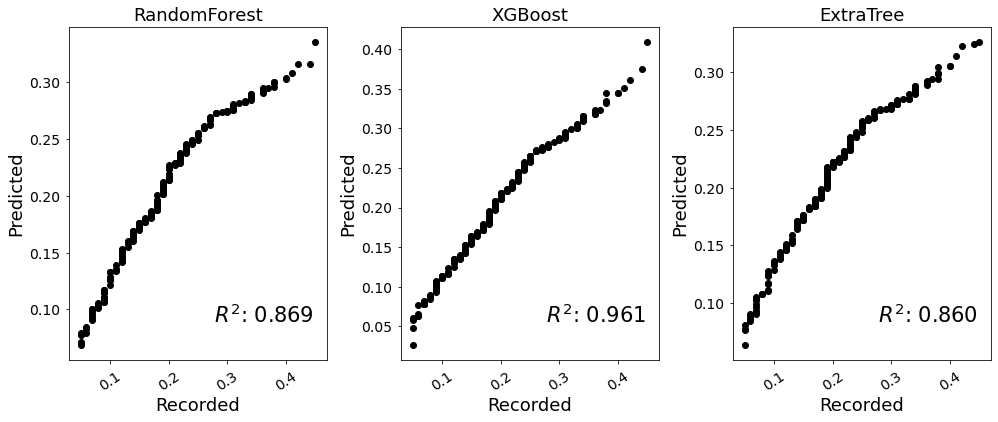

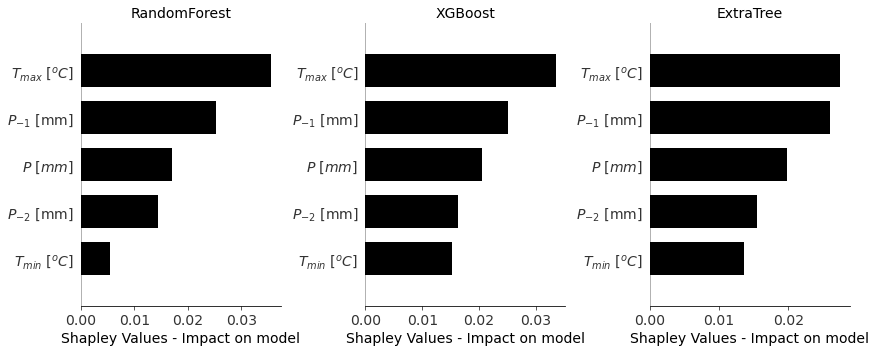

In [63]:
X = df_AI[Features].values
y = df_AI.iloc[:, -3].values # SM 5cm


X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y.ravel(),
                                                    test_size=0.3,
                                                    )
                                                    
pipeline_RF = Pipeline([('RandomForest', RandomForestRegressor())])
pipeline_XGB = Pipeline([('XGBoost', XGBRegressor())])
pipeline_ExTree = Pipeline([('ExtraTree', ExtraTreesRegressor())])
pipeliner = [pipeline_RF, pipeline_XGB, pipeline_ExTree]

#model = pipeline_RF.fit(X_train, y_train)


holdem = results(X_train, y_train, X_test, y_test, pipeliner)
print_results(holdem, y_test)


Soil = "week_SM5"

feature_importance(path_to_save, Soil, pipeliner, X, y, )


 Randomforest gives the best results for the test result although performs the least on training 
 while the RMSE is equal for both the XGBoost and the Extratree

### SM_25cm

+-------------------------------+
|       Training set Score      |
+--------------+----------+-----+
|  Algorithm   | R-square | MSE |
+--------------+----------+-----+
| RandomForest |   0.92   | 0.0 |
|   XGBoost    |   1.0    | 0.0 |
|  ExtraTree   |   1.0    | 0.0 |
+--------------+----------+-----+
+--------------------------------+
|         Test set Score         |
+--------------+----------+------+
|  Algorithm   | R-square | RMSE |
+--------------+----------+------+
| RandomForest |   0.87   | 0.02 |
|   XGBoost    |   0.94   | 0.01 |
|  ExtraTree   |   0.86   | 0.02 |
+--------------+----------+------+


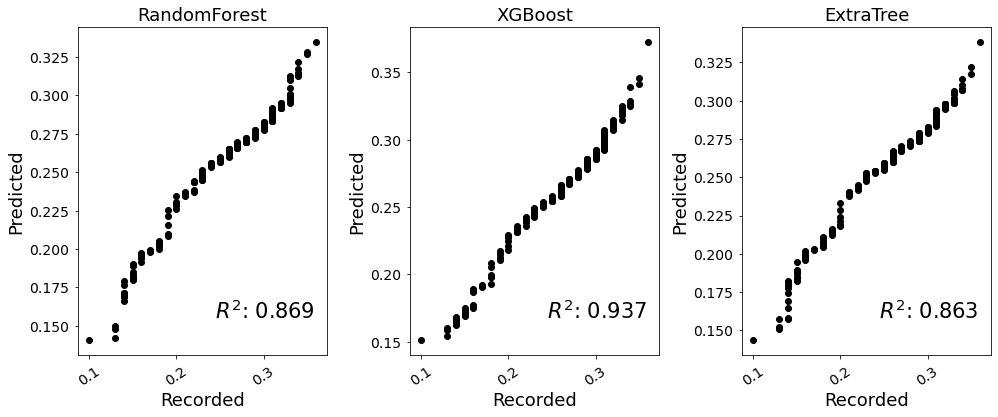

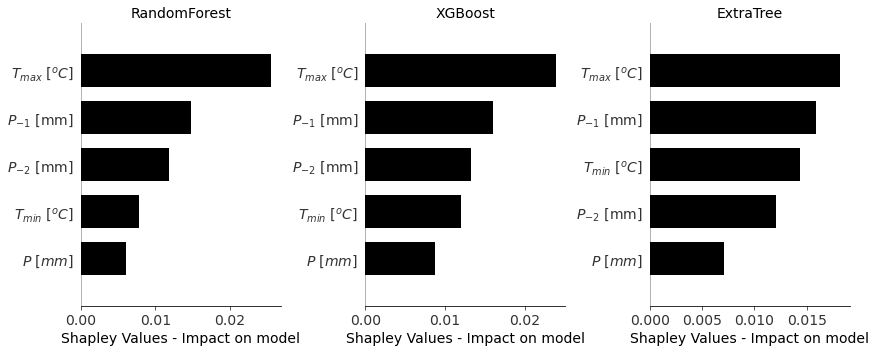

In [64]:
X = df_AI[Features].values
y = df_AI.iloc[:, -2].values # SM 25cm


X_train, X_test, y_train, y_test = train_test_split( X, 
                                                    y.ravel(),
                                                     test_size=0.3)
                                                     

pipeline_RF = Pipeline([('RandomForest', RandomForestRegressor())])
pipeline_XGB = Pipeline([('XGBoost', XGBRegressor())])
pipeline_ExTree = Pipeline([('ExtraTree', ExtraTreesRegressor())])
pipeliner = [pipeline_RF, pipeline_XGB, pipeline_ExTree]


holdem = results(X_train, y_train, X_test, y_test, pipeliner)
print_results(holdem, y_test)


Soil = "week_SM25"

feature_importance(path_to_save, Soil, pipeliner, X, y, )


### SM_45cm

+-------------------------------+
|       Training set Score      |
+--------------+----------+-----+
|  Algorithm   | R-square | MSE |
+--------------+----------+-----+
| RandomForest |   0.88   | 0.0 |
|   XGBoost    |   1.0    | 0.0 |
|  ExtraTree   |   1.0    | 0.0 |
+--------------+----------+-----+
+--------------------------------+
|         Test set Score         |
+--------------+----------+------+
|  Algorithm   | R-square | RMSE |
+--------------+----------+------+
| RandomForest |   0.76   | 0.02 |
|   XGBoost    |   0.85   | 0.02 |
|  ExtraTree   |   0.76   | 0.02 |
+--------------+----------+------+


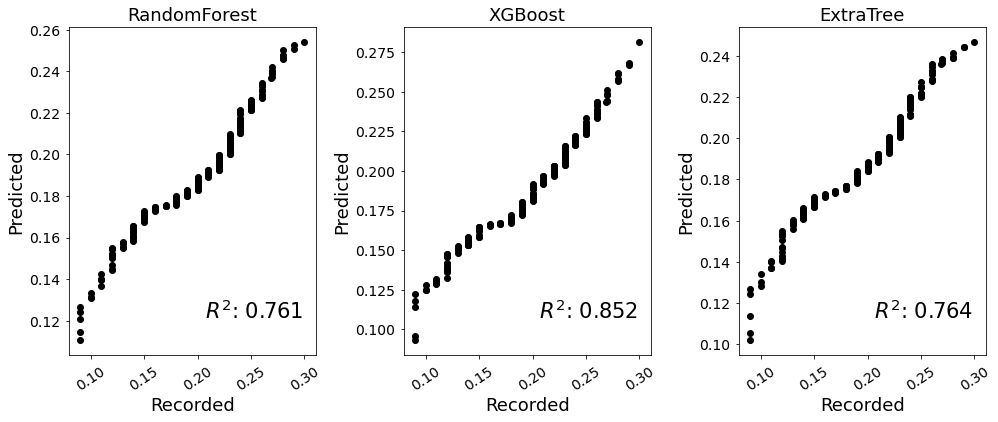

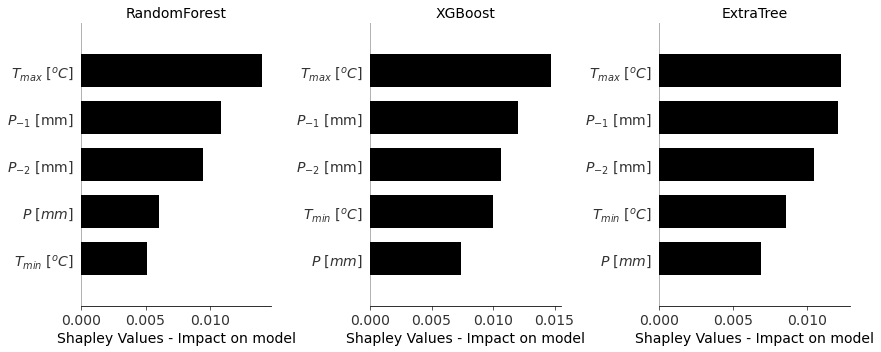

In [65]:
X = df_AI[Features].values
y = df_AI.iloc[:, -1].values # SM 45cm


X_train, X_test, y_train, y_test = train_test_split( X, 
                                                    y.ravel(),
                                                     test_size=0.3)
                                                     

pipeline_RF = Pipeline([('RandomForest', RandomForestRegressor())])
pipeline_XGB = Pipeline([('XGBoost', XGBRegressor())])
pipeline_ExTree = Pipeline([('ExtraTree', ExtraTreesRegressor())])
pipeliner = [pipeline_RF, pipeline_XGB, pipeline_ExTree]


#model = pipeline_RF.fit(X_train, y_train)


holdem = results(X_train, y_train, X_test, y_test, pipeliner)
print_results(holdem, y_test)


Soil = "week_SM45"

feature_importance(path_to_save, Soil, pipeliner, X, y, )


## Shapley Analysis

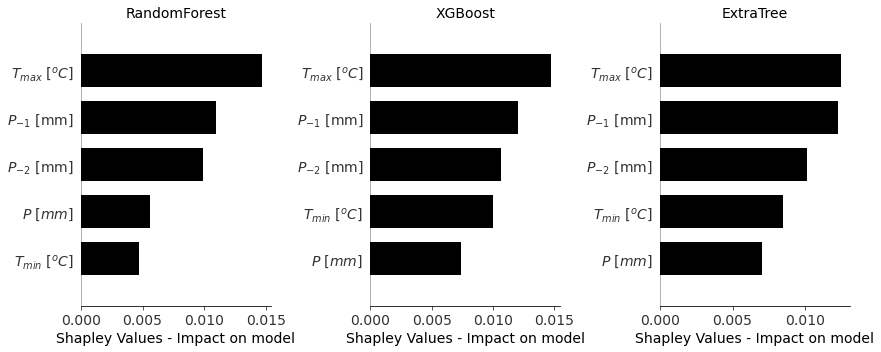

In [66]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.gridspec as gridspec

fig = plt.figure(tight_layout=True, figsize=(32, 5))
gs = gridspec.GridSpec(1, 3)
keep = {}
for count, model in enumerate(pipeliner):
    Modeled = model[0].fit(X, y.ravel())
    explainer = shap.TreeExplainer(Modeled)
    shap_values = explainer.shap_values(X)
    ax = fig.add_subplot(gs[0, count])
    shap.summary_plot(shap_values, X, Features, show=False,
                      plot_type="bar", color="black", plot_size=(12, 5))
    plt.xlabel('Shapley Values - Impact on model', fontsize=14)
    plt.tick_params(labelsize=14)
    # plt.ylabel(labelsize=16)
    plt.tight_layout(pad=1.2)
    plt.title(model.steps[0][0], fontsize=14)
    keep[model.steps[0][0]] = shap_values
    fig.align_labels()  # same as fig.align_xlabels(); fig.align_ylabels()

plt.savefig(path_to_save+r'/Histogram-importance.jpg',
            format='jpeg', dpi=300, bbox_inches='tight')
plt.show()


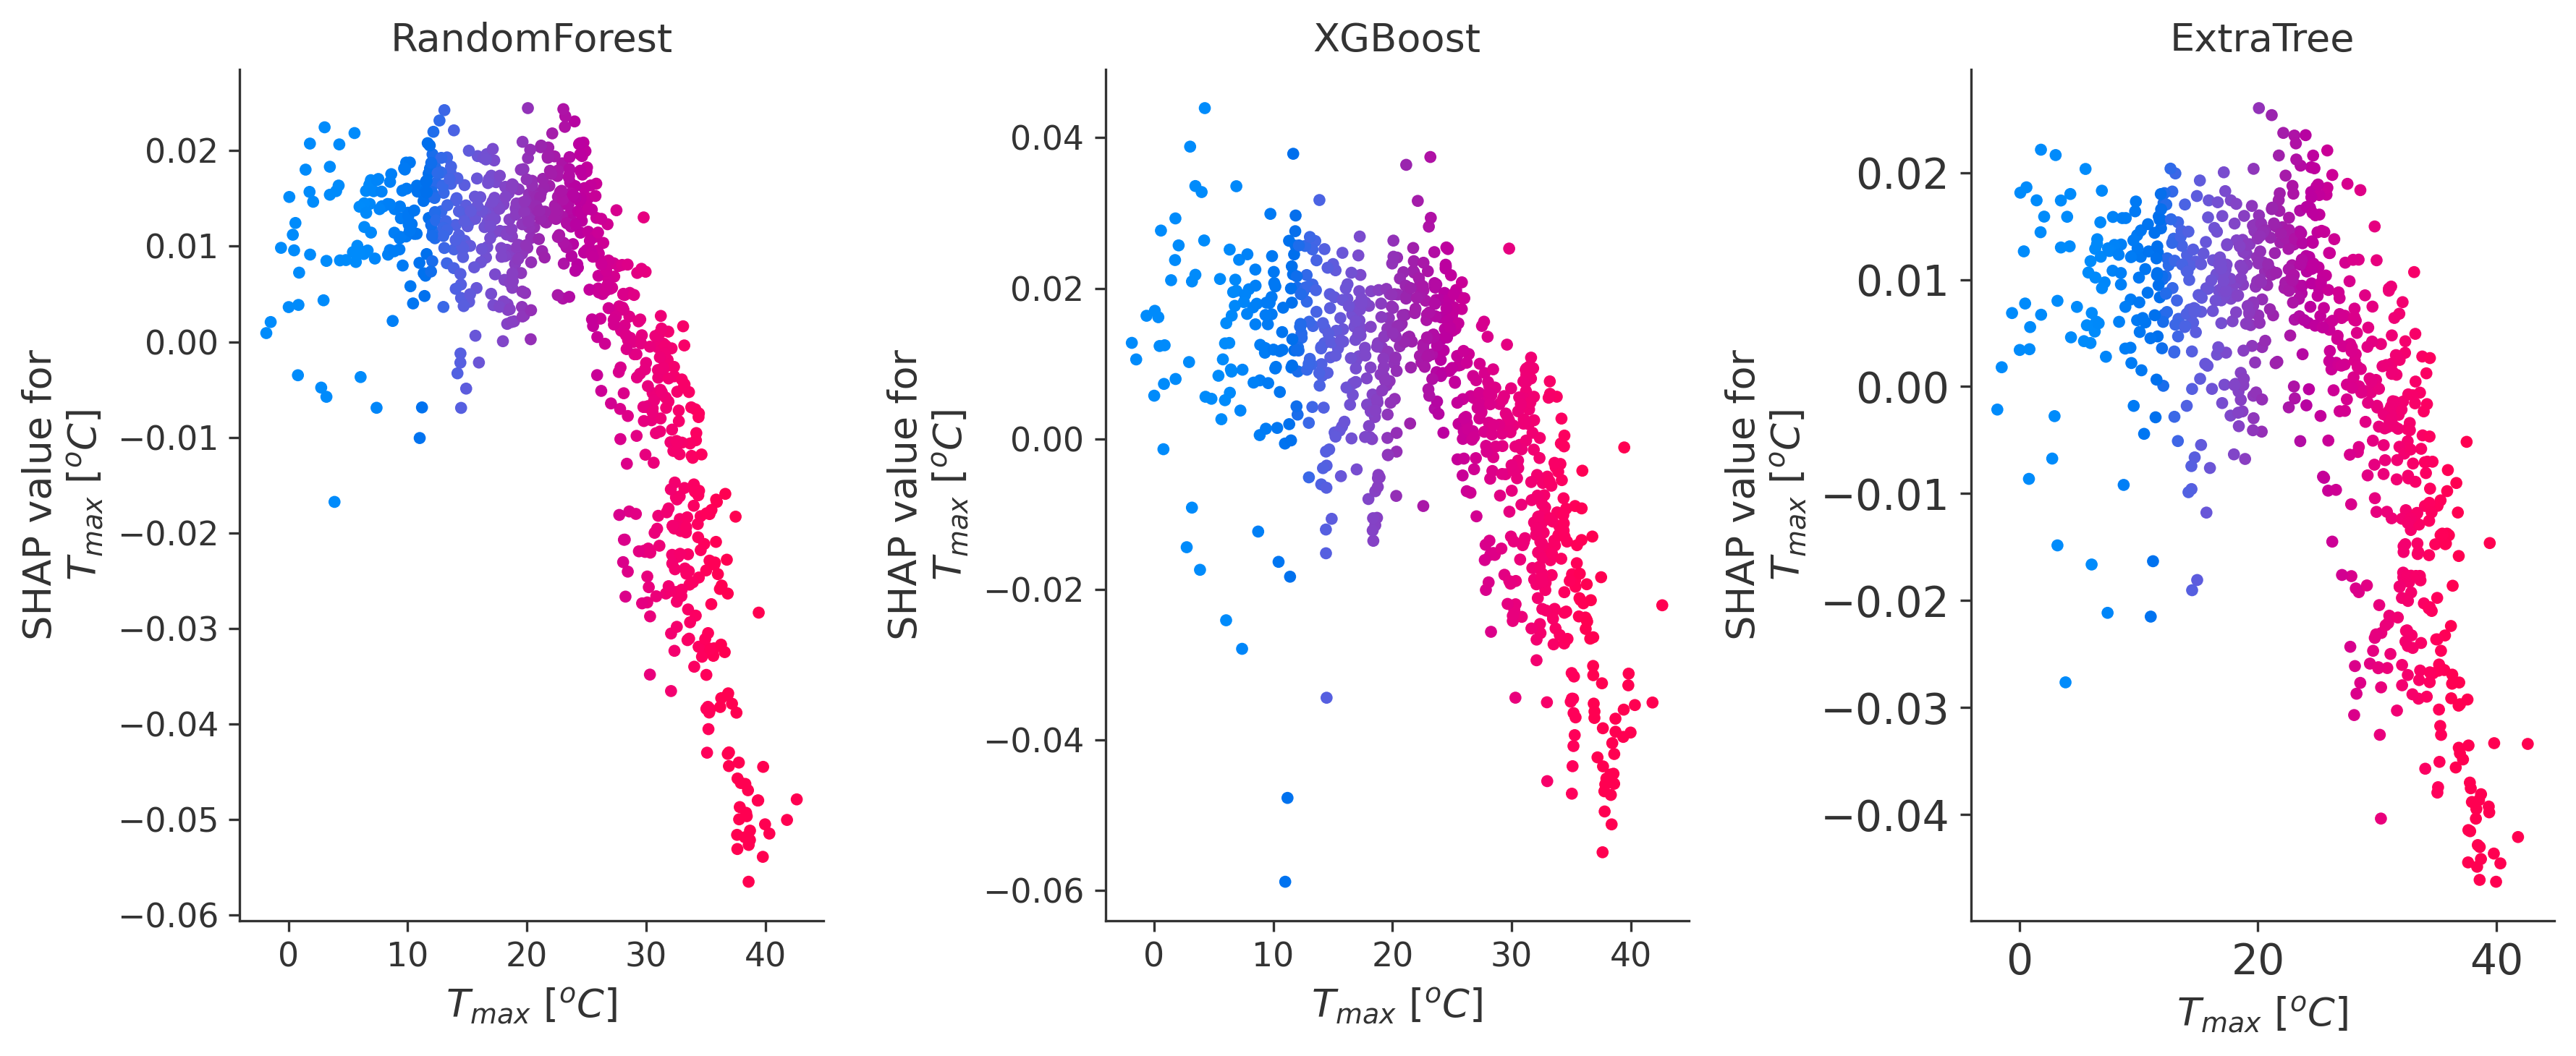

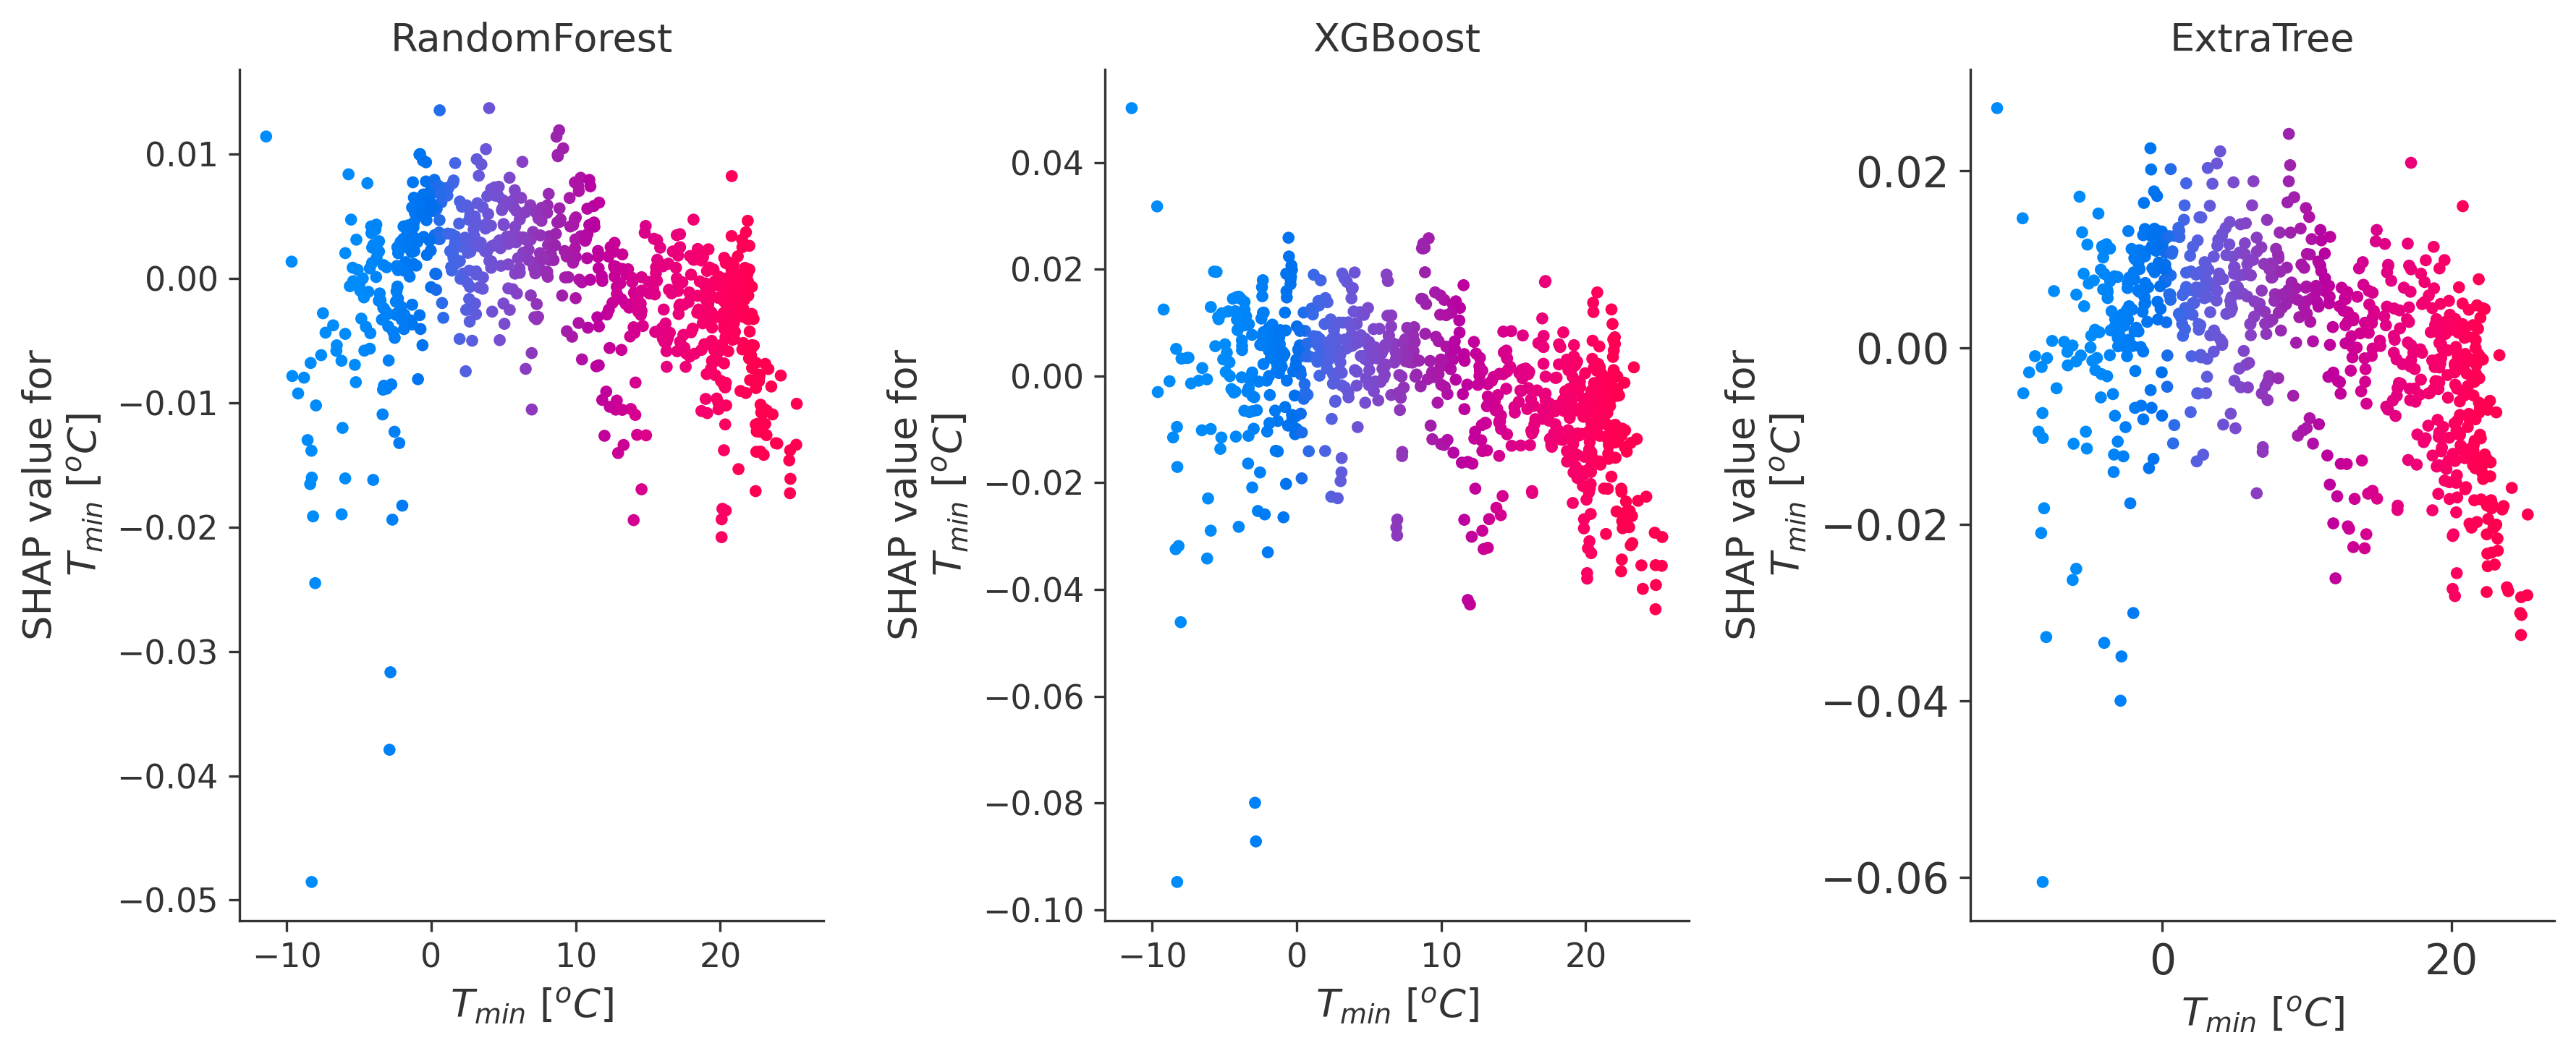

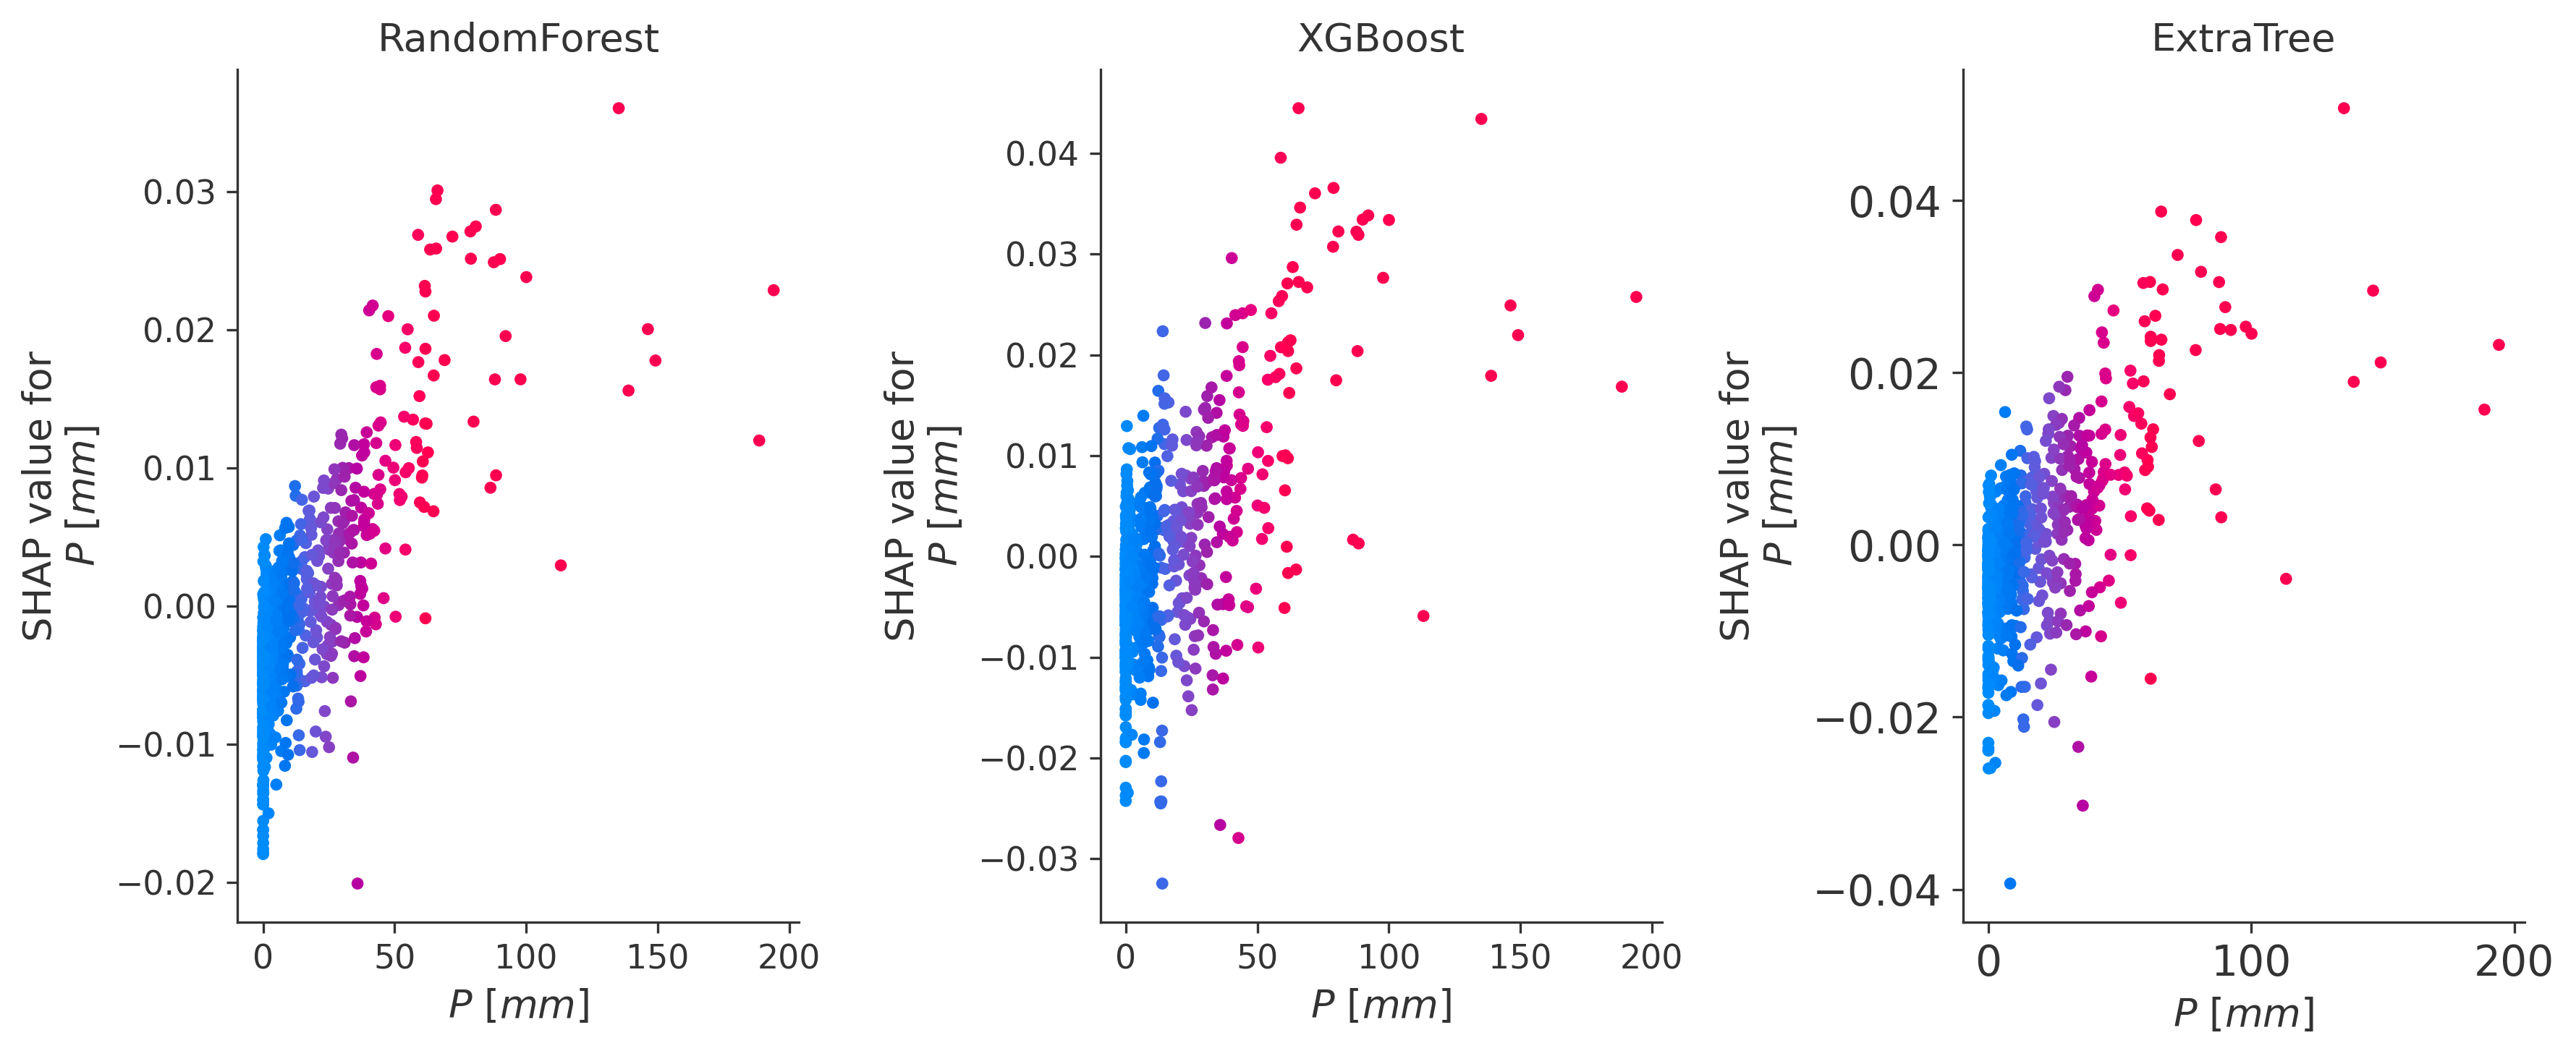

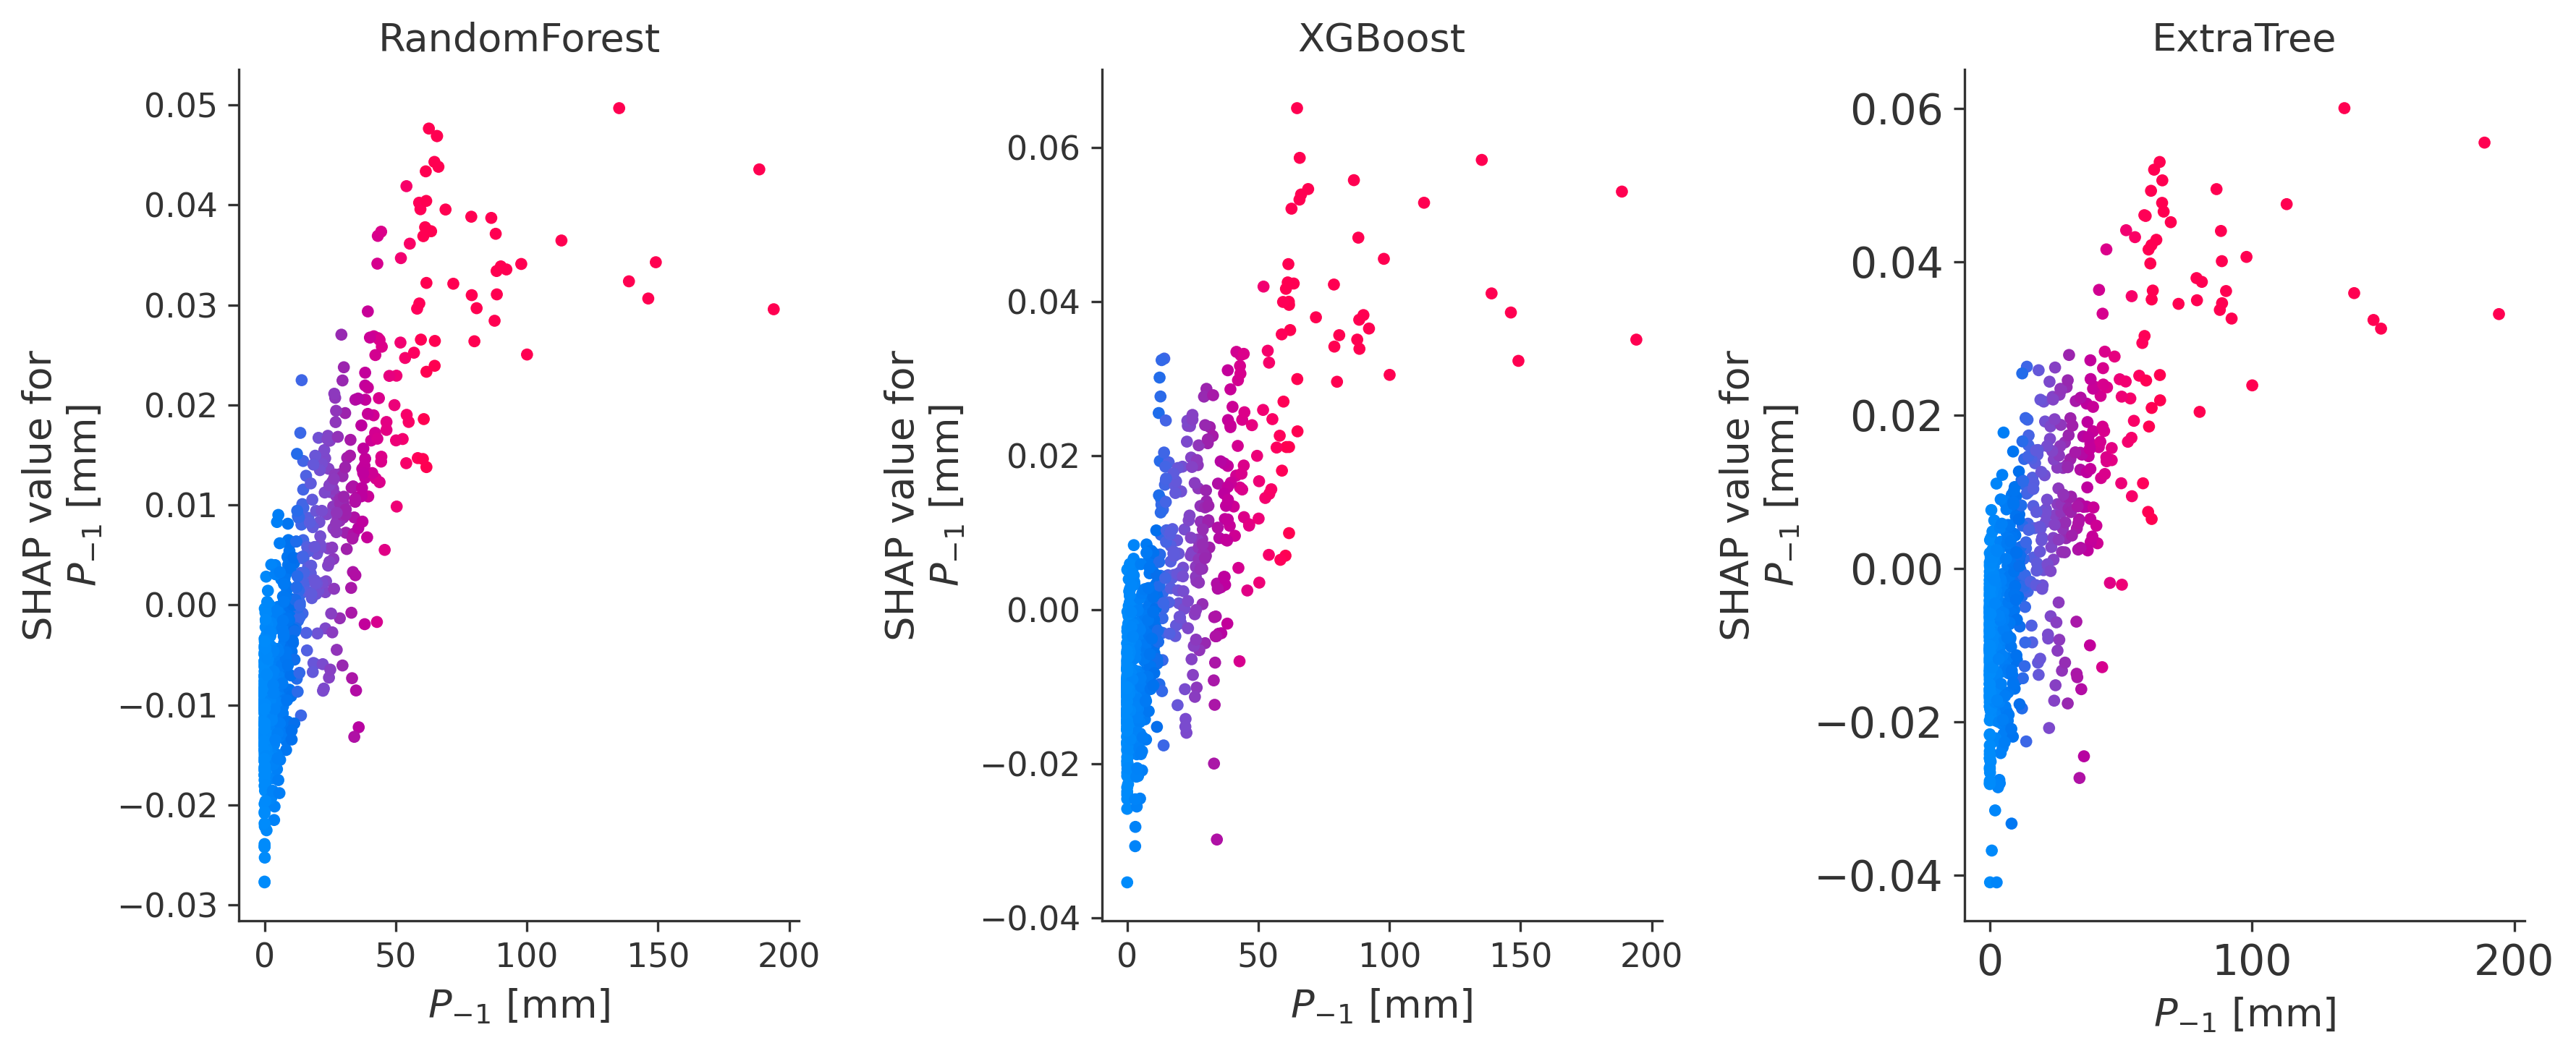

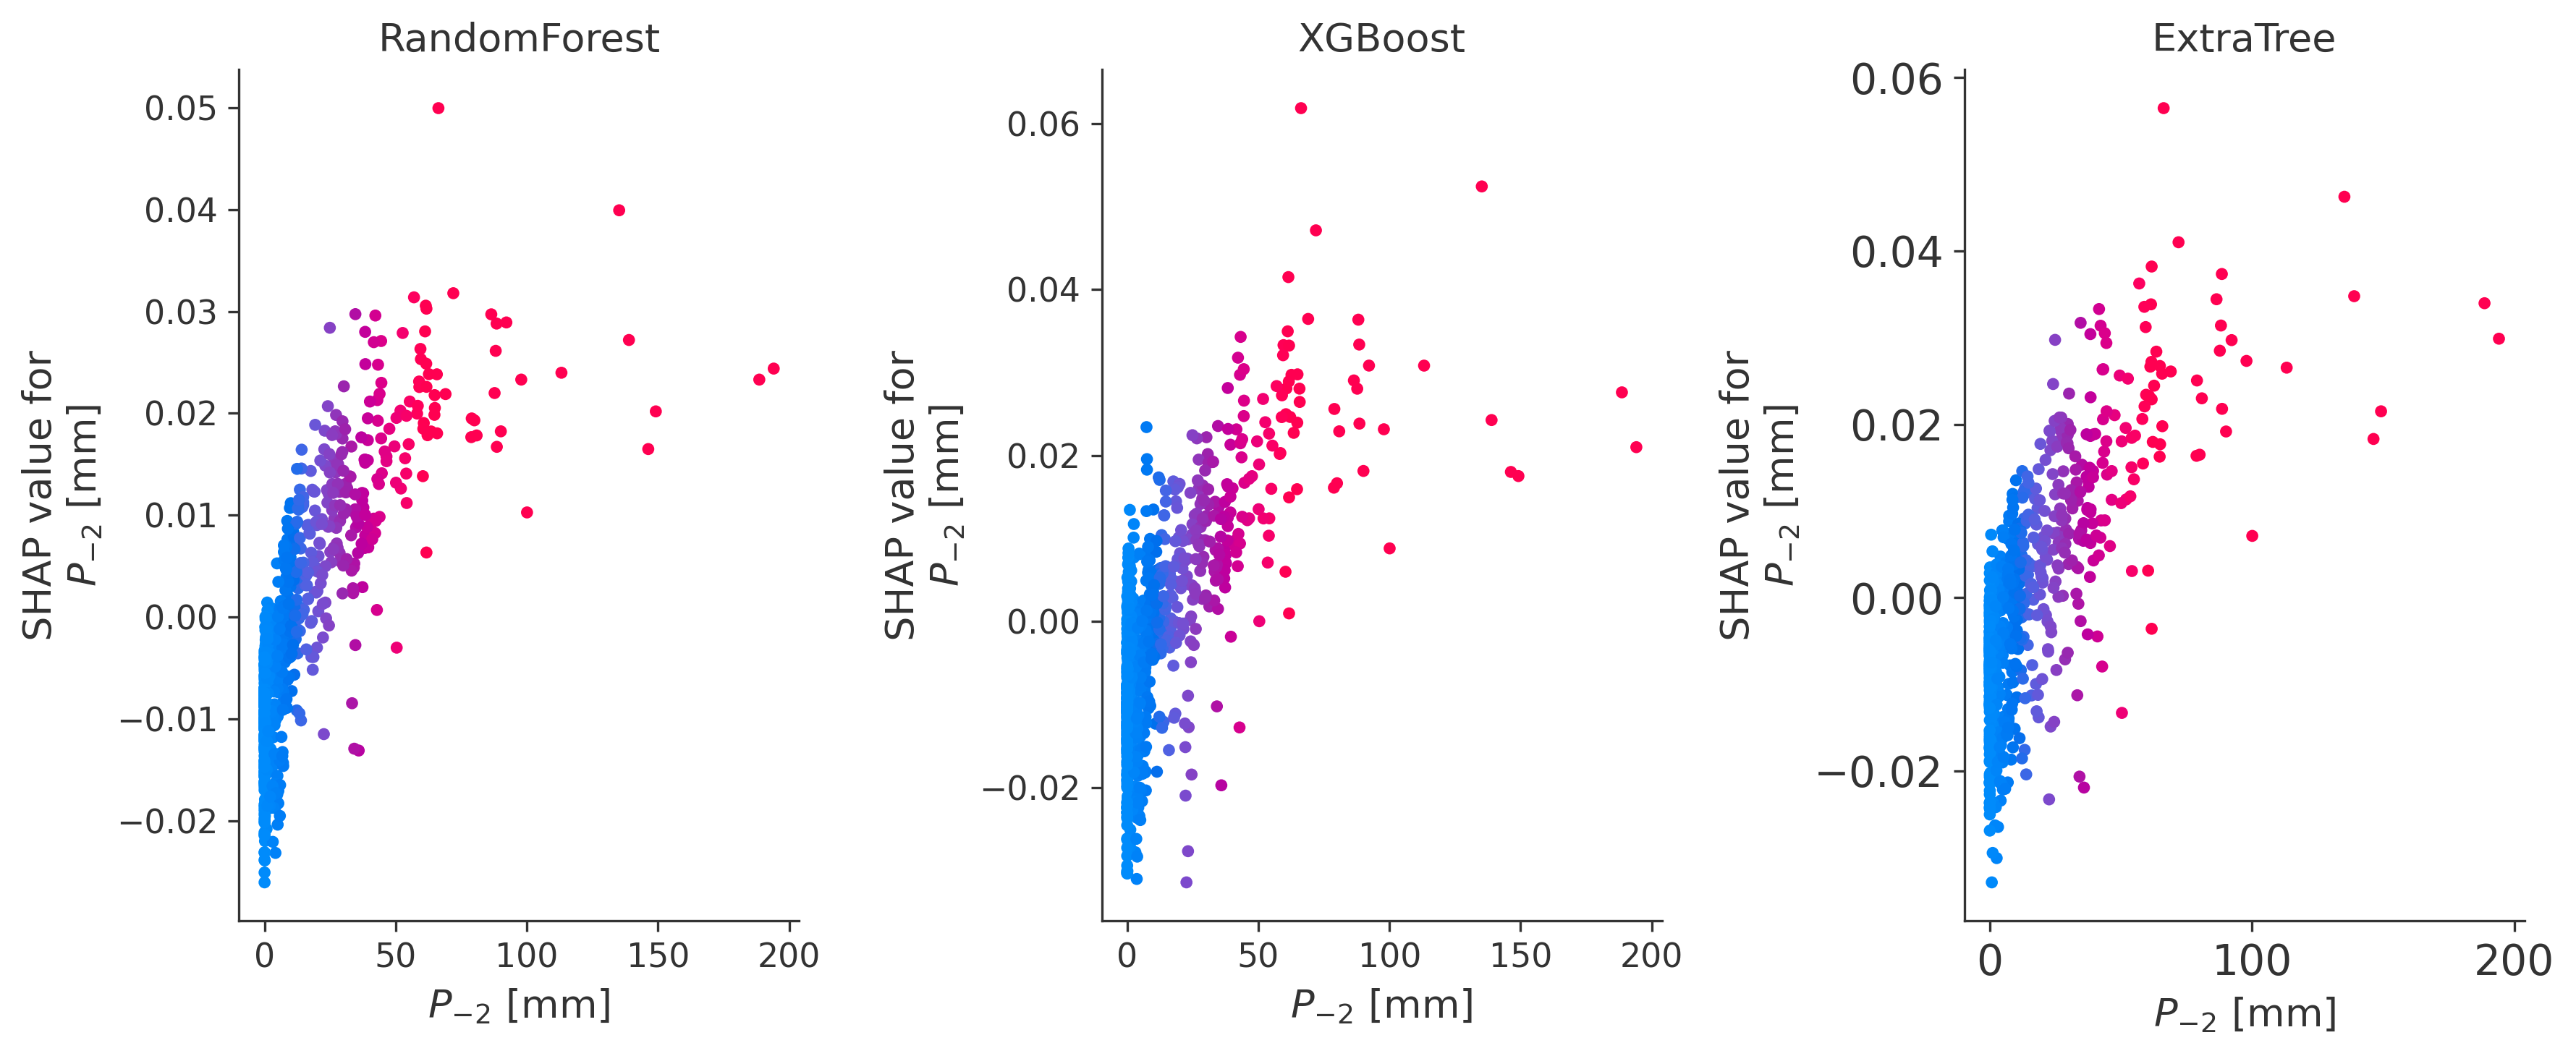

In [67]:
for i in Features:
    fig, ax = plt.subplots(1, 3, figsize=(12, 5), dpi=300)
    for count, j in enumerate(keep):
        shap.dependence_plot(i, keep[j], X, Features, ax=ax[count], show=False,
                             interaction_index=i, title=j)
        #ax[count].title(j, fontsize=14)
        plt.tick_params(labelsize=14)
        # plt.ylabel(labelsize=16)
        plt.tight_layout(pad=1.2)
        plt.savefig(path_to_save+r'/Feature Interaction_' + str(j)+'.jpg',
                    format='jpeg', dpi=300, bbox_inches='tight')


The above feature dependency plot is to be improved as we get more data. 

## Load the yearly crop yield and SPEI data for predicting 

In [94]:
current_directory = os.getcwd()
file_location = r'/Inputs/Caddo_Mesonet_winter_yeild.xlsx'

crop_yield = pd.read_excel(current_directory+file_location,
                           engine="openpyxl", skiprows = 1 ,sheet_name="Winter_Wheat")
crop_yield.keys()


Index(['Year', 'Month', 'CP (mm)', 'CHUs', 'EVI', 'Drought Index (use one)',
       'Unnamed: 6', 'Year.1', 'Winter Wheat Yield (mt ha-1) '],
      dtype='object')

In [95]:
crop_yield.rename({"Unnamed: 6": "SPEI",
                                   "Drought Index (use one)": "SPI"},
                                    axis=1, inplace = True)

In [98]:
crop_yield.iloc[1:,:]

Year      Month     CP (mm)         CHUs       EVI       SPI      SPEI  \
1    2005.0  September   96.774000   726.637037  0.446813  0.016976 -0.646098   
2    2005.0    October  138.599333  1246.746296  0.406774 -0.327774 -0.745894   
3    2005.0   November  138.599333  1579.491667  0.427720 -0.933103 -1.045667   
4    2005.0   December  143.340667  1683.243519  0.361844 -0.991888 -0.969127   
5    2006.0    January  148.251333  1944.424074  0.386566 -1.245217 -1.189809   
..      ...        ...         ...          ...       ...       ...       ...   
146  2020.0   February  274.404667  1988.285648  0.394769  1.177014  1.543043   
147  2020.0      March  399.372667  2382.668981  0.431570  1.553305  1.527136   
148  2020.0      April  448.987333  2805.610648  0.463074  1.227265  1.519278   
149  2020.0        May  528.066000  3426.761574  0.414075  0.435414  1.484406   
150  2020.0       June  576.749333  4200.579167  0.403513  0.242829  1.519161   

     Year.1  Winter Wheat Yield (mt ha-1)   
1    2006.0                        1.58828  
2    2006.0                        1.58828  
3    2006.0                        1.58828  
4    2006.0                        1.58828  
5    2006.0                        1.58828  
..      ...                            ...  
146  2020.0                        2.88044  
147  2020.0                        2.88044  
148  2020.0                        2.88044  
149  2020.0                        2.88044  
150  2020.0                        2.88044  

[150 rows x 9 columns]

In [ ]:
crop_yield = crop_yield['Caddo County Wheat Yield']
crop_yield = crop_yield.set_index('Year',).dropna()
crop_yield = crop_yield.iloc[::-1]
crop_yield 

In [ ]:
current_directory = os.getcwd()
file_location = r'/Inputs/caddo_SPEI.xlsx'

spei = pd.read_excel(
    current_directory+file_location, engine="openpyxl", sheet_name="spei12")

spei_yearly = spei.sort_values(by = 'Years').set_index("Years")
spei_yearly["SPEI_Avg"] = spei_yearly.median(axis=1)

spei_yearly

In [ ]:
# Resample the temperature
resampled_yearly = df_F108[['TMAX', "TMIN"]].resample('Y').median()
# Resample the Precipitation & Discharge sum
resampled_yearly["RAIN"] = df_F108["RAIN"].resample('Y').sum()
resampled_yearly["Dis_sum (CMS)"] = df_F108["CMS"].resample('Y').sum()
# Resample the SM
resampled_SM_yearly = df_F108.iloc[:, 4:].resample('Y').median()
# The transformed precipitation mean and median

df_F108_resampled_yearly = resampled_yearly.merge(resampled_SM_yearly, on='Date', how="inner")

df_F108_resampled_yearly['SPEI_Avg'] = spei_yearly["SPEI_Avg"].values



df_F108_resampled_yearly['bu/ac *'] = crop_yield['bu/ac *'].values
#df_F108_resampled_yearly['t/ha'] = crop_yield['t/ha'].values

corr_plot(df_F108_resampled_yearly, 'Data correlation plot')


In [ ]:
df_F108_resampled_yearly

In [121]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

from shapely.geometry import Point



In [126]:
station_info

STATION_ID      LAT     LONG           Cordinates
0       F102  35.4504 -98.5443  (35.4504, -98.5443)
1       F106  35.3915 -98.5138  (35.3915, -98.5138)
2     F107 *  35.3764 -98.4650   (35.3764, -98.465)
3       F108  35.3611 -98.5712  (35.3611, -98.5712)
4       F110  35.3303 -98.5202  (35.3303, -98.5202)
5     F107re  35.3627 -98.4490   (35.3627, -98.449)

In [128]:
# Read the station information 
station_info = pd.read_excel("FC Micronet Locations.xlsx", 
                             usecols = ["STATION_ID", "LAT","LONG",])

# Drop all columns that are not relevant
station_info = station_info.iloc[:-1,:]

# Create the coordinates columns from the lat and long columns
station_info["Cordinates"] = list(zip(stattion_info.LAT, stattion_info.LONG))

# Create the coordinate points used in geopanda
station_info["Coordinates"] = station_info["Cordinates"].apply(Point)

# Convert the dataframe geopandas dataframe
station_info = gpd.GeoDataFrame(station_info, geometry="Coordinates")
station_info.head()


STATION_ID      LAT     LONG           Cordinates             Coordinates
0       F102  35.4504 -98.5443  (35.4504, -98.5443)  POINT (35.450 -98.544)
1       F106  35.3915 -98.5138  (35.3915, -98.5138)  POINT (35.392 -98.514)
2     F107 *  35.3764 -98.4650   (35.3764, -98.465)  POINT (35.376 -98.465)
3       F108  35.3611 -98.5712  (35.3611, -98.5712)  POINT (35.361 -98.571)
4       F110  35.3303 -98.5202  (35.3303, -98.5202)  POINT (35.330 -98.520)

In [144]:
import folium



map = folium.Map(location=station_info["Cordinates"][1], zoom_start=12)
for point in range(0, len(station_info)):
    folium.Marker(station_info["Cordinates"][point],
                  popup=station_info['STATION_ID'][point]).add_to(map)
map
